# Data Source: https://physionet.org/content/ptb-xl/1.0.3/#files-panel

Summary: ECG Classification using LSTM on PTB-XL Dataset

Introduction:

This Jupyter notebook explores the application of Long Short-Term Memory (LSTM) networks for the classification of Electrocardiography (ECG) signals. The project utilizes the PTB-XL dataset, a publicly available electrocardiography dataset comprising 21,799 clinical 12-lead ECGs from 18,869 patients. The dataset includes diverse ECG statements conforming to the SCP-ECG standard, covering diagnostic, form, and rhythm aspects. The objective is to develop a machine learning model capable of distinguishing between normal ECG and ECG signals indicative of myocardial infarction.

Dataset Overview:

The PTB-XL dataset is organized into 12-lead ECG records, with accompanying metadata such as demographics, infarction characteristics, and diagnostic likelihoods. The dataset encompasses a wide age range (0 to 95 years) and exhibits a distribution of diagnoses, including normal ECG, myocardial infarction, ST/T change, conduction disturbance, and hypertrophy. The waveform files are stored in WaveForm DataBase (WFDB) format, providing high-resolution (500Hz) and downsampled (100Hz) versions.

Data Preprocessing:

The dataset undergoes preprocessing, ensuring privacy compliance by pseudonymizing personal information and adhering to HIPAA standards. ECG statements follow the SCP-ECG standard, and metadata is stored in a structured format. The dataset is divided into recommended training and test sets, facilitating the training and evaluation of machine learning algorithms.

Methods:

The waveform data, acquired over nearly seven years, is recorded with devices from Schiller AG. Annotations are generated by cardiologists, and a significant portion of records undergoes validation by a second cardiologist and a technical expert. The dataset includes recommended 10-fold train-test splits, enhancing robustness in model evaluation.

Usage and Benchmarking:

The notebook includes a minimal usage example (example_physionet.py) demonstrating how to load waveform data and labels, leveraging the proposed train-test split. Benchmarking procedures for the dataset are described in reference [4].

Ethics and Acknowledgments:

The Institutional Ethics Committee has approved the publication of the anonymous data. The dataset's release is accompanied by extensive acknowledgments, highlighting support from funding agencies and individuals contributing to annotations and medical expertise.

Access and License:

The dataset is openly accessible under a Creative Commons Attribution 4.0 International Public License. Users are encouraged to cite the relevant publications when utilizing the dataset.

Conclusion:

This Jupyter notebook serves as a comprehensive guide for leveraging the PTB-XL dataset in a machine learning project focused on ECG classification. The LSTM-based approach aims to contribute to the development of accurate and efficient automatic ECG interpretation algorithms, with potential applications in clinical diagnosis support systems

# Loading database and statements CSV files

In [2]:
import pandas as pd

# Load the CSV files into Pandas DataFrames
database_csv_path = ".\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\ptbxl_database.csv"
statements_csv_path = ".\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\scp_statements.csv"


# Save the separated data to new CSV files
df_database = pd.read_csv(database_csv_path)
df_statements = pd.read_csv(statements_csv_path)

# Display basic information about the data
print("Database DataFrame:")
print(df_database.info())

print("\nStatements DataFrame:")
print(df_statements.info())


Database DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21799 entries, 0 to 21798
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        21799 non-null  int64  
 1   patient_id                    21799 non-null  float64
 2   age                           21799 non-null  float64
 3   sex                           21799 non-null  int64  
 4   height                        6974 non-null   float64
 5   weight                        9421 non-null   float64
 6   nurse                         20326 non-null  float64
 7   site                          21782 non-null  float64
 8   device                        21799 non-null  object 
 9   recording_date                21799 non-null  object 
 10  report                        21799 non-null  object 
 11  scp_codes                     21799 non-null  object 
 12  heart_axis                    13331 non-

In [49]:
#Checking ECG IDs
print(df_database['ecg_id'].tolist())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 22

In [50]:
%pip install wfdb

Note: you may need to restart the kernel to use updated packages.


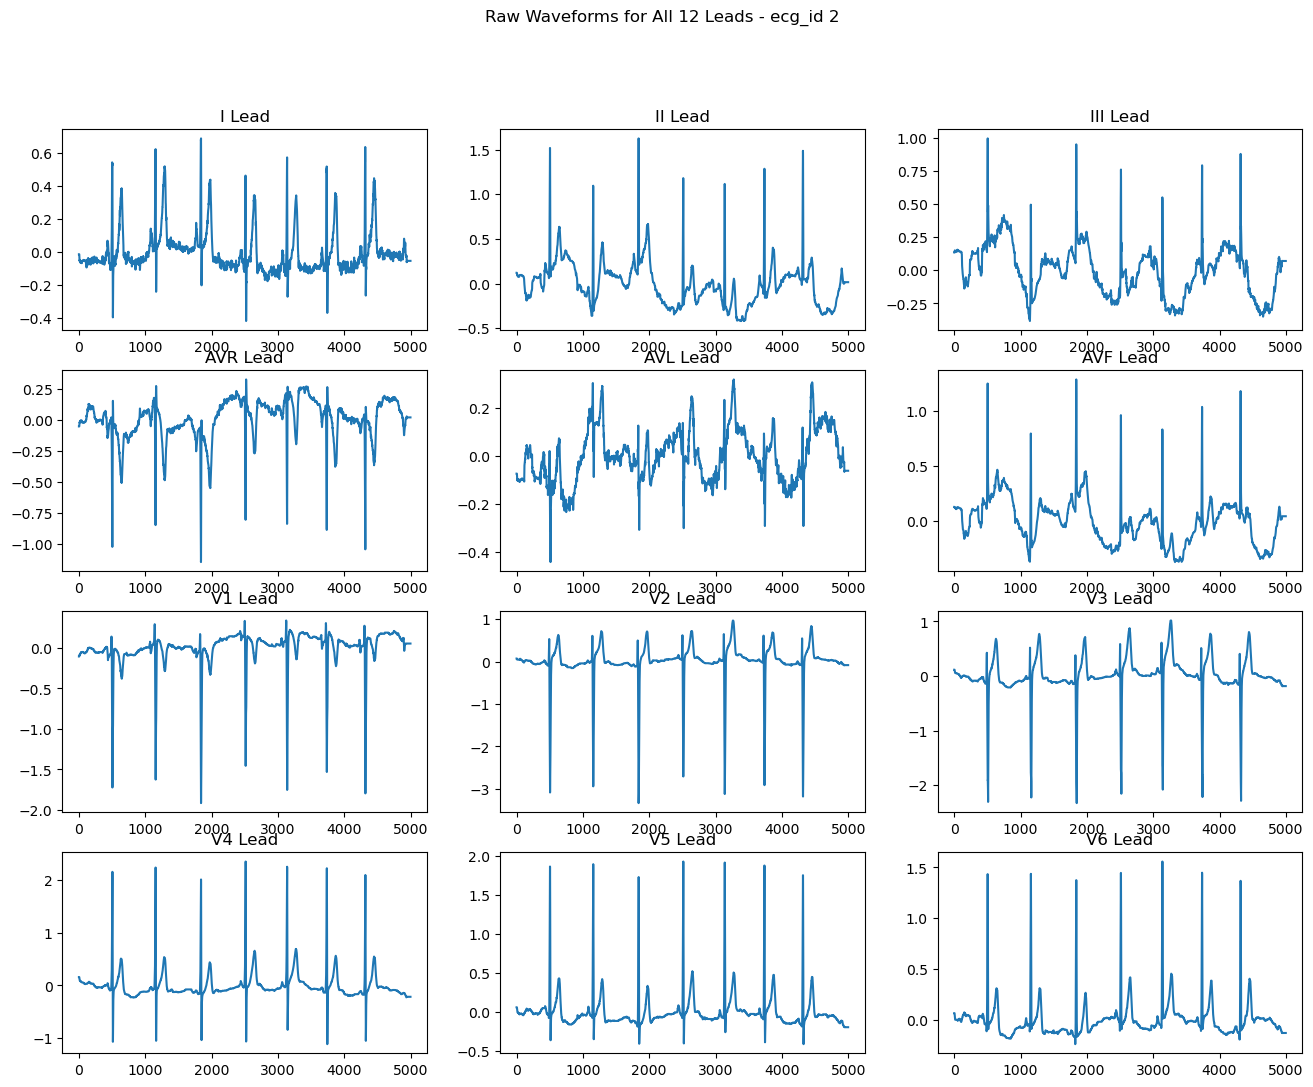

In [3]:
#Visualizing one ECG Signal



import wfdb
import matplotlib.pyplot as plt

# Specify the ecg_id you want to visualize
ecg_id_to_visualize = 2  # Change this to the desired ecg_id

# Find the corresponding record in the DataFrame
record_info = df_database[df_database['ecg_id'] == ecg_id_to_visualize].iloc[0]

# Get the filename for the high-resolution waveform
filename_hr = record_info['filename_hr']

base_path = "./ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/"

# Load the waveform data
record_hr = wfdb.rdrecord(base_path + filename_hr)

# Visualize all 12 leads
plt.figure(figsize=(16, 12))
for lead_index, lead_name in enumerate(record_hr.sig_name):
    signal = record_hr.p_signal[:, lead_index]
    plt.subplot(4, 3, lead_index + 1)
    plt.plot(signal)
    plt.title(f"{lead_name} Lead")

plt.suptitle(f"Raw Waveforms for All 12 Leads - ecg_id {ecg_id_to_visualize}")
plt.show()

In [52]:
print("\nSample records from Database DataFrame:")
print(df_database.head())

print("\nSample records from Statements DataFrame:")
print(df_statements.head())


Sample records from Database DataFrame:
   ecg_id  patient_id   age  sex  height  weight  nurse  site     device  \
0       1     15709.0  56.0    1     NaN    63.0    2.0   0.0  CS-12   E   
1       2     13243.0  19.0    0     NaN    70.0    2.0   0.0  CS-12   E   
2       3     20372.0  37.0    1     NaN    69.0    2.0   0.0  CS-12   E   
3       4     17014.0  24.0    0     NaN    82.0    2.0   0.0  CS-12   E   
4       5     17448.0  19.0    1     NaN    70.0    2.0   0.0  CS-12   E   

        recording_date  ... validated_by_human  baseline_drift static_noise  \
0  1984-11-09 09:17:34  ...               True             NaN    , I-V1,     
1  1984-11-14 12:55:37  ...               True             NaN          NaN   
2  1984-11-15 12:49:10  ...               True             NaN          NaN   
3  1984-11-15 13:44:57  ...               True    , II,III,AVF          NaN   
4  1984-11-17 10:43:15  ...               True   , III,AVR,AVF          NaN   

  burst_noise electrodes_pr

In [4]:
# Remove rows with missing diagnostic_class in df_database
df_statements_cleaned = df_statements.dropna(subset=['diagnostic_class'])

# Display the cleaned DataFrame
display(df_statements_cleaned)

# Count the number of datapoints for each class
class_counts = df_statements_cleaned['diagnostic_class'].info()

# Display the counts
print("Number of datapoints for each class:")
print(class_counts)

Unnamed: 0                                        description  diagnostic  \
0         NDT                     non-diagnostic T abnormalities         1.0   
1        NST_                            non-specific ST changes         1.0   
2         DIG                                   digitalis-effect         1.0   
3       LNGQT                                   long QT-interval         1.0   
4        NORM                                         normal ECG         1.0   
5         IMI                     inferior myocardial infarction         1.0   
6        ASMI                 anteroseptal myocardial infarction         1.0   
7         LVH                       left ventricular hypertrophy         1.0   
8        LAFB                     left anterior fascicular block         1.0   
9        ISC_                              non-specific ischemic         1.0   
10      IRBBB               incomplete right bundle branch block         1.0   
11       1AVB                              first degree AV block         1.0   
12       IVCD  non-specific intraventricular conduction distu...         1.0   
13      ISCAL                    ischemic in anterolateral leads         1.0   
14      CRBBB                 complete right bundle branch block         1.0   
15      CLBBB                  complete left bundle branch block         1.0   
16       ILMI                inferolateral myocardial infarction         1.0   
17    LAO/LAE                   left atrial overload/enlargement         1.0   
18        AMI                     anterior myocardial infarction         1.0   
19       ALMI                anterolateral myocardial infarction         1.0   
20      ISCIN                         ischemic in inferior leads         1.0   
21      INJAS        subendocardial injury in anteroseptal leads         1.0   
22        LMI                      lateral myocardial infarction         1.0   
23      ISCIL                    ischemic in inferolateral leads         1.0   
24       LPFB                    left posterior fascicular block         1.0   
25      ISCAS                     ischemic in anteroseptal leads         1.0   
26      INJAL       subendocardial injury in anterolateral leads         1.0   
27      ISCLA                          ischemic in lateral leads         1.0   
28        RVH                      right ventricular hypertrophy         1.0   
29      ANEUR  ST-T changes compatible with ventricular aneurysm         1.0   
30    RAO/RAE                  right atrial overload/enlargement         1.0   
31         EL     electrolytic disturbance or drug (former EDIS)         1.0   
32        WPW                      Wolf-Parkinson-White syndrome         1.0   
33      ILBBB                incomplete left bundle branch block         1.0   
34      IPLMI         inferoposterolateral myocardial infarction         1.0   
35      ISCAN                         ischemic in anterior leads         1.0   
36       IPMI              inferoposterior myocardial infarction         1.0   
37      SEHYP                                 septal hypertrophy         1.0   
38      INJIN            subendocardial injury in inferior leads         1.0   
39      INJLA             subendocardial injury in lateral leads         1.0   
40        PMI                    posterior myocardial infarction         1.0   
41       3AVB                              third degree AV block         1.0   
42      INJIL       subendocardial injury in inferolateral leads         1.0   
43       2AVB                             second degree AV block         1.0   

    form  rhythm diagnostic_class diagnostic_subclass  \
0    1.0     NaN             STTC                STTC   
1    1.0     NaN             STTC                NST_   
2    1.0     NaN             STTC                STTC   
3    1.0     NaN             STTC                STTC   
4    NaN     NaN             NORM                NORM   
5    NaN     NaN               MI                 IMI   
6  

<class 'pandas.core.series.Series'>
Int64Index: 44 entries, 0 to 43
Series name: diagnostic_class
Non-Null Count  Dtype 
--------------  ----- 
44 non-null     object
dtypes: object(1)
memory usage: 704.0+ bytes
Number of datapoints for each class:
None


In [5]:
# Check unique values in the diagnostic subclasses column of df_statements
unique_diagnostic_values = df_statements['diagnostic_subclass'].unique()

# Display the unique values
print("Unique values in the 'diagnostic subclass' column:")
print(unique_diagnostic_values)


Unique values in the 'diagnostic subclass' column:
['STTC' 'NST_' 'NORM' 'IMI' 'AMI' 'LVH' 'LAFB/LPFB' 'ISC_' 'IRBBB' '_AVB'
 'IVCD' 'ISCA' 'CRBBB' 'CLBBB' 'LAO/LAE' 'ISCI' 'LMI' 'RVH' 'RAO/RAE'
 'WPW' 'ILBBB' 'SEHYP' 'PMI' nan]


In [6]:
#Removing missing diagnostic subclasses
df_statements_morecleaned = df_statements_cleaned.dropna(subset=['diagnostic_subclass'])

#Displaying new cleaned dataframe
print(df_statements_morecleaned)

   Unnamed: 0                                        description  diagnostic  \
0         NDT                     non-diagnostic T abnormalities         1.0   
1        NST_                            non-specific ST changes         1.0   
2         DIG                                   digitalis-effect         1.0   
3       LNGQT                                   long QT-interval         1.0   
4        NORM                                         normal ECG         1.0   
5         IMI                     inferior myocardial infarction         1.0   
6        ASMI                 anteroseptal myocardial infarction         1.0   
7         LVH                       left ventricular hypertrophy         1.0   
8        LAFB                     left anterior fascicular block         1.0   
9        ISC_                              non-specific ischemic         1.0   
10      IRBBB               incomplete right bundle branch block         1.0   
11       1AVB                           

In [7]:
#Displaying unique values for subclasses
print(df_statements_morecleaned['diagnostic_subclass'].unique())

['STTC' 'NST_' 'NORM' 'IMI' 'AMI' 'LVH' 'LAFB/LPFB' 'ISC_' 'IRBBB' '_AVB'
 'IVCD' 'ISCA' 'CRBBB' 'CLBBB' 'LAO/LAE' 'ISCI' 'LMI' 'RVH' 'RAO/RAE'
 'WPW' 'ILBBB' 'SEHYP' 'PMI']


In [8]:
#Displaying unique values for classes
print(df_statements_morecleaned['diagnostic_class'].unique())

['STTC' 'NORM' 'MI' 'HYP' 'CD']


In [9]:
# Filtering rows with diagnostic class "MI" or "NORM"

filtered_df_statements = df_statements_morecleaned[df_statements_morecleaned['diagnostic_class'].isin(['MI', 'NORM'])]

print(filtered_df_statements)


   Unnamed: 0                                   description  diagnostic  form  \
4        NORM                                    normal ECG         1.0   NaN   
5         IMI                inferior myocardial infarction         1.0   NaN   
6        ASMI            anteroseptal myocardial infarction         1.0   NaN   
16       ILMI           inferolateral myocardial infarction         1.0   NaN   
18        AMI                anterior myocardial infarction         1.0   NaN   
19       ALMI           anterolateral myocardial infarction         1.0   NaN   
21      INJAS   subendocardial injury in anteroseptal leads         1.0   NaN   
22        LMI                 lateral myocardial infarction         1.0   NaN   
26      INJAL  subendocardial injury in anterolateral leads         1.0   NaN   
34      IPLMI    inferoposterolateral myocardial infarction         1.0   NaN   
36       IPMI         inferoposterior myocardial infarction         1.0   NaN   
38      INJIN       subendoc

In [10]:
print(filtered_df_statements['diagnostic_class'].unique())

['NORM' 'MI']


In [11]:
# Count the number of samples for each diagnostic subclass
class_counts = filtered_df_statements['diagnostic_class'].value_counts()

# Display the counts
print("Sample counts for each diagnostic class:")
print(class_counts)


Sample counts for each diagnostic class:
MI      14
NORM     1
Name: diagnostic_class, dtype: int64


In [12]:
print(filtered_df_statements)


   Unnamed: 0                                   description  diagnostic  form  \
4        NORM                                    normal ECG         1.0   NaN   
5         IMI                inferior myocardial infarction         1.0   NaN   
6        ASMI            anteroseptal myocardial infarction         1.0   NaN   
16       ILMI           inferolateral myocardial infarction         1.0   NaN   
18        AMI                anterior myocardial infarction         1.0   NaN   
19       ALMI           anterolateral myocardial infarction         1.0   NaN   
21      INJAS   subendocardial injury in anteroseptal leads         1.0   NaN   
22        LMI                 lateral myocardial infarction         1.0   NaN   
26      INJAL  subendocardial injury in anterolateral leads         1.0   NaN   
34      IPLMI    inferoposterolateral myocardial infarction         1.0   NaN   
36       IPMI         inferoposterior myocardial infarction         1.0   NaN   
38      INJIN       subendoc

In [13]:
# Extract the relevant ecg_ids from the filtered df_statements
#selected_ecg_ids = filtered_df_statements['ecg_id'].tolist()

print(filtered_df_statements)



   Unnamed: 0                                   description  diagnostic  form  \
4        NORM                                    normal ECG         1.0   NaN   
5         IMI                inferior myocardial infarction         1.0   NaN   
6        ASMI            anteroseptal myocardial infarction         1.0   NaN   
16       ILMI           inferolateral myocardial infarction         1.0   NaN   
18        AMI                anterior myocardial infarction         1.0   NaN   
19       ALMI           anterolateral myocardial infarction         1.0   NaN   
21      INJAS   subendocardial injury in anteroseptal leads         1.0   NaN   
22        LMI                 lateral myocardial infarction         1.0   NaN   
26      INJAL  subendocardial injury in anterolateral leads         1.0   NaN   
34      IPLMI    inferoposterolateral myocardial infarction         1.0   NaN   
36       IPMI         inferoposterior myocardial infarction         1.0   NaN   
38      INJIN       subendoc

In [14]:

# Filter the statements dataframe to get only MI and NORM classes
mi_norm_classes = ['MI', 'NORM']
filtered_statements = df_statements[df_statements['diagnostic_class'].isin(mi_norm_classes)]

# Get the corresponding ecg_ids for MI and NORM classes
selected_ecg_ids = filtered_statements['aECG REFID'].tolist()

# Filter the database dataframe based on selected ecg_ids
filtered_database = df_database[df_database['ecg_id'].isin(selected_ecg_ids)]

# Now, filtered_database contains only rows with ecg_ids corresponding to MI and NORM classes

print(filtered_database)


Empty DataFrame
Columns: [ecg_id, patient_id, age, sex, height, weight, nurse, site, device, recording_date, report, scp_codes, heart_axis, infarction_stadium1, infarction_stadium2, validated_by, second_opinion, initial_autogenerated_report, validated_by_human, baseline_drift, static_noise, burst_noise, electrodes_problems, extra_beats, pacemaker, strat_fold, filename_lr, filename_hr]
Index: []

[0 rows x 28 columns]


In [15]:
print(filtered_statements)

   Unnamed: 0                                   description  diagnostic  form  \
4        NORM                                    normal ECG         1.0   NaN   
5         IMI                inferior myocardial infarction         1.0   NaN   
6        ASMI            anteroseptal myocardial infarction         1.0   NaN   
16       ILMI           inferolateral myocardial infarction         1.0   NaN   
18        AMI                anterior myocardial infarction         1.0   NaN   
19       ALMI           anterolateral myocardial infarction         1.0   NaN   
21      INJAS   subendocardial injury in anteroseptal leads         1.0   NaN   
22        LMI                 lateral myocardial infarction         1.0   NaN   
26      INJAL  subendocardial injury in anterolateral leads         1.0   NaN   
34      IPLMI    inferoposterolateral myocardial infarction         1.0   NaN   
36       IPMI         inferoposterior myocardial infarction         1.0   NaN   
38      INJIN       subendoc

In [16]:
# Display the unique scp_codes
print(df_database['scp_codes'].unique())

# # Separate normal and MI ECGs
# normal_ecgs = df[df['Superclass'] == 'NORM']
# mi_ecgs = df[df['Superclass'] == 'MI']

# # Save the separated data to new CSV files
# normal_ecgs.to_csv('path/to/normal_ecgs.csv', index=False)
# mi_ecgs.to_csv('path/to/mi_ecgs.csv', index=False)

["{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}" "{'NORM': 80.0, 'SBRAD': 0.0}"
 "{'NORM': 100.0, 'SR': 0.0}" ...
 "{'IMI': 100.0, 'ISCLA': 50.0, 'ABQRS': 0.0, 'SVARR': 0.0}"
 "{'IMI': 80.0, 'ISCLA': 100.0, 'PVC': 100.0, 'ABQRS': 0.0, 'SR': 0.0}"
 "{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'STACH': 0.0}"]


In [17]:
import ast

def extract_classes(scp_codes_str, target_classes):
    try:
        scp_codes_dict = ast.literal_eval(scp_codes_str.replace("'", "\""))
        return {key: scp_codes_dict.get(key, 0.0) for key in target_classes}
    except (ValueError, SyntaxError):
        return {}

# Define the target classes for MI and NORM
mi_classes = ['IMI', 'ASMI', 'ILMI', 'AMI', 'ALMI', 'INJAS', 'LMI', 'INJAL', 'IPLMI', 'IPMI', 'INJIN', 'INJLA', 'PMI', 'INJIL']
norm_class = ['NORM']

# Apply the extract_classes function to create new columns
df_database['mi_classes'] = df_database['scp_codes'].apply(lambda x: extract_classes(x, mi_classes))
df_database['norm_class'] = df_database['scp_codes'].apply(lambda x: extract_classes(x, norm_class))


In [18]:
mi_filter = df_database['mi_classes'].apply(lambda x: any(val > 0.0 for val in x.values()))
norm_filter = df_database['norm_class'].apply(lambda x: any(val > 0.0 for val in x.values()))

df_mi = df_database[mi_filter]
df_norm = df_database[norm_filter]



In [19]:
print(df_mi)

       ecg_id  patient_id   age  sex  height  weight  nurse  site      device  \
7           8     11275.0  48.0    0     NaN    95.0    2.0   0.0   CS-12   E   
38         39     13619.0  56.0    0     NaN     NaN    2.0   0.0   CS-12   E   
49         50     16961.0  59.0    1     NaN    64.0    2.0   0.0   CS-12   E   
62         63     15265.0  30.0    0     NaN    78.0    2.0   0.0   CS-12   E   
76         77      8555.0  43.0    0     NaN    63.0    0.0   0.0   CS-12   E   
...       ...         ...   ...  ...     ...     ...    ...   ...         ...   
21781   21820     18655.0  80.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21785   21824     19977.0  69.0    0     NaN     NaN    1.0   2.0  AT-60    3   
21787   21826      9178.0  82.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21788   21827     13862.0  79.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21789   21828     13862.0  79.0    1     NaN     NaN    1.0   2.0  AT-60    3   

            recording_date 

In [20]:
print(df_mi['scp_codes'].unique())

["{'IMI': 35.0, 'ABQRS': 0.0, 'SR': 0.0}"
 "{'IMI': 15.0, 'LNGQT': 100.0, 'NST_': 100.0, 'DIG': 100.0, 'ABQRS': 0.0, 'SR': 0.0}"
 "{'LMI': 15.0, 'IVCD': 100.0, 'SR': 0.0}" ...
 "{'IMI': 80.0, 'ABQRS': 0.0, 'SARRH': 0.0}"
 "{'IMI': 100.0, 'ISCLA': 50.0, 'ABQRS': 0.0, 'SVARR': 0.0}"
 "{'IMI': 80.0, 'ISCLA': 100.0, 'PVC': 100.0, 'ABQRS': 0.0, 'SR': 0.0}"]


In [21]:
#Filtering out MI diagnosis with certainty below 100%

threshold = 99.9
df_mi_filtered = df_mi[df_mi['mi_classes'].apply(lambda x: any(val > threshold for val in x.values()))]

print(df_mi_filtered['scp_codes'].unique())


["{'ASMI': 100.0, 'SR': 0.0}"
 "{'ASMI': 100.0, 'ALMI': 100.0, 'IMI': 15.0, 'ANEUR': 50.0}"
 "{'ILMI': 100.0, 'ASMI': 100.0, 'SR': 0.0}" ...
 "{'ASMI': 100.0, 'ISCAL': 100.0, 'LAFB': 100.0, 'ANEUR': 50.0, 'ABQRS': 0.0, 'SR': 0.0}"
 "{'IMI': 100.0, 'AMI': 50.0, 'LAFB': 100.0, '1AVB': 100.0, 'ABQRS': 0.0, 'SR': 0.0}"
 "{'IMI': 100.0, 'ISCLA': 50.0, 'ABQRS': 0.0, 'SVARR': 0.0}"]


In [22]:
#Checking number of MI cases
print(df_mi_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 169 to 21788
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        2975 non-null   int64  
 1   patient_id                    2975 non-null   float64
 2   age                           2975 non-null   float64
 3   sex                           2975 non-null   int64  
 4   height                        657 non-null    float64
 5   weight                        685 non-null    float64
 6   nurse                         2748 non-null   float64
 7   site                          2973 non-null   float64
 8   device                        2975 non-null   object 
 9   recording_date                2975 non-null   object 
 10  report                        2975 non-null   object 
 11  scp_codes                     2975 non-null   object 
 12  heart_axis                    2279 non-null   object 
 13  

In [23]:
print(df_norm['scp_codes'].unique())

["{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}" "{'NORM': 80.0, 'SBRAD': 0.0}"
 "{'NORM': 100.0, 'SR': 0.0}" "{'NORM': 80.0, 'SARRH': 0.0}"
 "{'NORM': 100.0, 'SARRH': 0.0}" "{'NORM': 80.0, 'SR': 0.0}"
 "{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}"
 "{'NORM': 100.0, 'SBRAD': 0.0}" "{'NORM': 80.0, 'STACH': 0.0}"
 "{'NORM': 100.0}" "{'NORM': 100.0, 'TAB_': 0.0}"
 "{'NORM': 80.0, 'HVOLT': 0.0, 'SR': 0.0}"
 "{'NORM': 80.0, '1AVB': 100.0, 'SR': 0.0}"
 "{'NORM': 50.0, 'PVC': 100.0, 'SR': 0.0}"
 "{'NORM': 100.0, 'LAFB': 100.0, 'SBRAD': 0.0}"
 "{'NORM': 80.0, 'IRBBB': 100.0, 'SR': 0.0}"
 "{'NORM': 100.0, 'NT_': 0.0, 'SR': 0.0}"
 "{'NORM': 100.0, 'VCLVH': 0.0, 'SR': 0.0}"
 "{'NORM': 80.0, 'VCLVH': 0.0, 'SBRAD': 0.0}"
 "{'NORM': 80.0, 'IRBBB': 100.0, 'HVOLT': 0.0, 'SR': 0.0}"
 "{'NORM': 80.0, 'PVC': 0.0, 'SR': 0.0}"
 "{'NORM': 80.0, 'NT_': 0.0, 'SR': 0.0}" "{'NORM': 50.0, 'AFIB': 0.0}"
 "{'NORM': 100.0, 'IRBBB': 100.0, 'SARRH': 0.0}" "{'NORM': 80.0}"
 "{'NORM': 100.0, 'IRBBB': 100.0, 'LOWT': 0.0, 'SR': 

In [24]:
#Filtering out diagnosis with certainty below 100%

threshold = 99.9
df_norm_filtered = df_norm[df_norm['norm_class'].apply(lambda x: any(val > threshold for val in x.values()))]

print(df_norm_filtered['scp_codes'])




0        {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
2                      {'NORM': 100.0, 'SR': 0.0}
3                      {'NORM': 100.0, 'SR': 0.0}
4                      {'NORM': 100.0, 'SR': 0.0}
5                      {'NORM': 100.0, 'SR': 0.0}
                           ...                   
21786                  {'NORM': 100.0, 'SR': 0.0}
21792                  {'NORM': 100.0, 'SR': 0.0}
21795    {'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}
21797                  {'NORM': 100.0, 'SR': 0.0}
21798                  {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 7172, dtype: object


In [25]:
# Add 'ecg_class' column to df_mi_filtered with value '1'
df_mi_filtered['ecg_class'] = 1

# Add 'ecg_class' column to df_norm_filtered with value '0'
df_norm_filtered['ecg_class'] = 0

# Print the modified DataFrames
print("df_mi_filtered:")
print(df_mi_filtered)

print("\ndf_norm_filtered:")
print(df_norm_filtered)


df_mi_filtered:
       ecg_id  patient_id   age  sex  height  weight  nurse  site      device  \
169       177     21551.0  73.0    0     NaN     NaN    NaN   3.0      AT-6 C   
173       181     21551.0  73.0    0     NaN     NaN    NaN   3.0      AT-6 C   
176       184     13112.0  74.0    0     NaN     NaN    NaN   3.0      AT-6 C   
181       189     13112.0  74.0    0     NaN     NaN    NaN   3.0      AT-6 C   
226       234     17115.0  78.0    0     NaN     NaN    1.0   2.0       CS-12   
...       ...         ...   ...  ...     ...     ...    ...   ...         ...   
21749   21788     12360.0  72.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21754   21793     17237.0  56.0    0     NaN     NaN    0.0   0.0  CS100    3   
21766   21805     16291.0  72.0    0     NaN     NaN    1.0   2.0  AT-60    3   
21776   21815     14433.0  82.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21788   21827     13862.0  79.0    1     NaN     NaN    1.0   2.0  AT-60    3   

           

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\1034725586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mi_filtered['ecg_class'] = 1
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\1034725586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm_filtered['ecg_class'] = 0


# Combining and then shuffling Filtered MI and NORM Samples

In [26]:
import pandas as pd
from sklearn.utils import shuffle

# Combine the DataFrames
df_combined_filtered = pd.concat([df_norm_filtered, df_mi_filtered])

# Shuffle the combined DataFrame randomly
df_combined_filtered = shuffle(df_combined_filtered)

# Reset the index of the combined DataFrame
df_combined_filtered.reset_index(drop=True, inplace=True)

# Print the first few rows of the combined DataFrame
print(df_combined_filtered)


       ecg_id  patient_id   age  sex  height  weight  nurse  site      device  \
0       15275     10712.0  55.0    0     NaN     NaN    0.0   0.0  CS100    3   
1       17593     16394.0  18.0    1     NaN    72.0    0.0   0.0   CS-12   E   
2        3523      7034.0  65.0    0   180.0    77.0    3.0   1.0  AT-6     6   
3       20016     11364.0  56.0    0     NaN     NaN    1.0   2.0  AT-60    3   
4        3960      4118.0  87.0    1   152.0    63.0    6.0   1.0  AT-6 C 5.5   
...       ...         ...   ...  ...     ...     ...    ...   ...         ...   
10142   18701     17157.0  47.0    1     NaN     NaN    1.0   2.0       CS-12   
10143   10975      7273.0  47.0    1   170.0    63.0   11.0   1.0  AT-6 C 5.5   
10144    1081      4456.0  82.0    1   155.0    58.0    NaN  34.0  AT-6 C 5.5   
10145   10366      3608.0  80.0    1   160.0    83.0    5.0   1.0  AT-6     6   
10146   12991     18608.0  84.0    0     NaN     NaN    1.0   2.0       CS-12   

            recording_date 

# Extracting ECG Signals from file

In [27]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load ECG Signal Data from directory
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [(f, wfdb.rdsamp(path+f)) for f in df.filename_lr]
    else:
        data = [(f, wfdb.rdsamp(path+f)) for f in df.filename_hr]

    # Extract 'ecg_id' and signal data
    ecg_ids, signals = zip(*[(f, signal) for f, (signal, _) in data])
    
    return ecg_ids, np.array(signals)

# Load raw signal data for the combined DataFrame
path = "./ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/"
sampling_rate = 100

# Load raw signal data
ecg_ids_combined, X_combined = load_raw_data(df_combined_filtered, sampling_rate, path)

# Create a DataFrame with ecg_ids and signals for each lead
lead_names = [f"{i}_lead" for i in range(12)]
df_ecg_signals = pd.DataFrame(columns=['ecg_ids'] + lead_names)

for ecg_id, signals in zip(ecg_ids_combined, X_combined):
    row_data = [ecg_id] + list(signals.T)
    df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)

# Display the DataFrame
print(df_ecg_signals)


C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

                         ecg_ids  \
0      records100/15000/15275_lr   
1      records100/17000/17593_lr   
2      records100/03000/03523_lr   
3      records100/20000/20016_lr   
4      records100/03000/03960_lr   
...                          ...   
10142  records100/18000/18701_lr   
10143  records100/10000/10975_lr   
10144  records100/01000/01081_lr   
10145  records100/10000/10366_lr   
10146  records100/12000/12991_lr   

                                                  0_lead  \
0      [0.015, 0.017, 0.023, 0.012, -0.007, -0.021, -...   
1      [-0.166, -0.184, -0.202, -0.188, -0.168, -0.16...   
2      [-0.015, -0.014, -0.03, -0.063, -0.085, -0.094...   
3      [-0.028, -0.018, -0.014, -0.015, -0.016, -0.02...   
4      [-0.028, -0.032, -0.052, -0.058, -0.066, -0.04...   
...                                                  ...   
10142  [-0.044, -0.053, -0.066, -0.052, -0.048, -0.04...   
10143  [-0.05, -0.05, -0.05, -0.057, -0.061, -0.059, ...   
10144  [-0.022, -0.039, -0.

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\3381943601.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecg_signals = df_ecg_signals.append(pd.Series(row_data, index=df_ecg_signals.columns), ignore_index=True)
C:\Users\Emmanuel Kissi\AppData\Local

In [30]:
# Display the DataFrame
print(df_ecg_signals)

                         ecg_ids  \
0      records100/15000/15275_lr   
1      records100/17000/17593_lr   
2      records100/03000/03523_lr   
3      records100/20000/20016_lr   
4      records100/03000/03960_lr   
...                          ...   
10142  records100/18000/18701_lr   
10143  records100/10000/10975_lr   
10144  records100/01000/01081_lr   
10145  records100/10000/10366_lr   
10146  records100/12000/12991_lr   

                                                  0_lead  \
0      [0.015, 0.017, 0.023, 0.012, -0.007, -0.021, -...   
1      [-0.166, -0.184, -0.202, -0.188, -0.168, -0.16...   
2      [-0.015, -0.014, -0.03, -0.063, -0.085, -0.094...   
3      [-0.028, -0.018, -0.014, -0.015, -0.016, -0.02...   
4      [-0.028, -0.032, -0.052, -0.058, -0.066, -0.04...   
...                                                  ...   
10142  [-0.044, -0.053, -0.066, -0.052, -0.048, -0.04...   
10143  [-0.05, -0.05, -0.05, -0.057, -0.061, -0.059, ...   
10144  [-0.022, -0.039, -0.

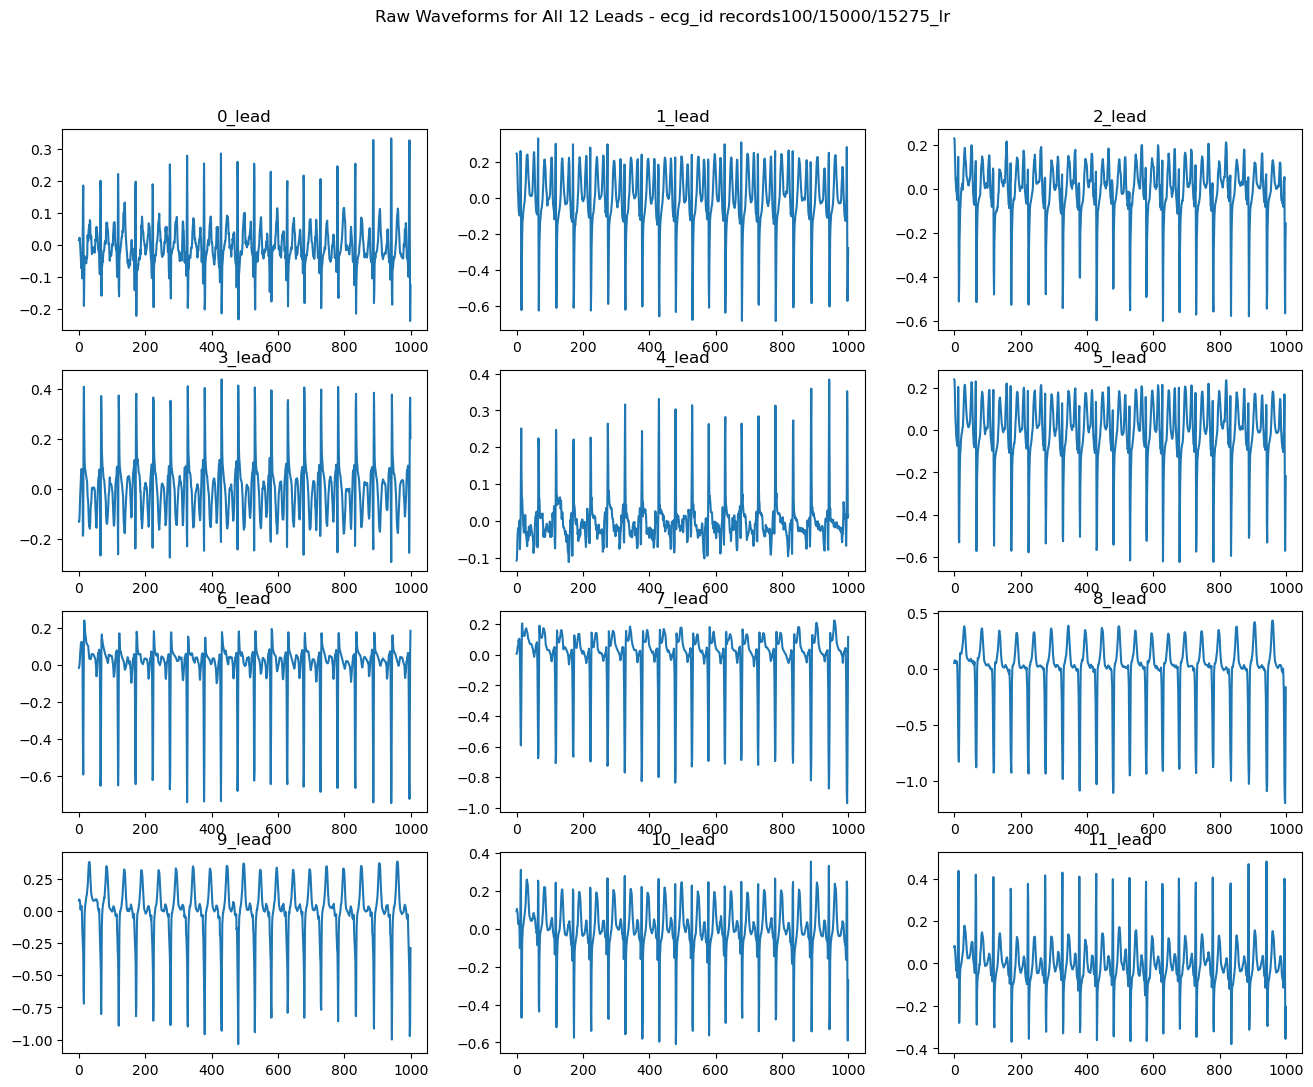

In [31]:
# Specify the ecg_id you want to visualize (here, using the first ecg_id)
ecg_id_to_visualize = df_ecg_signals['ecg_ids'].iloc[0]

# Get the corresponding row from the DataFrame
ecg_row = df_ecg_signals[df_ecg_signals['ecg_ids'] == ecg_id_to_visualize]

# Get lead names and signal values
lead_names = [f"{i}_lead" for i in range(12)]
lead_signals = ecg_row[lead_names].values.flatten()

# Visualize all 12 leads
plt.figure(figsize=(16, 12))
for lead_index, lead_name in enumerate(lead_names):
    signal = lead_signals[lead_index]
    plt.subplot(4, 3, lead_index + 1)
    plt.plot(signal)
    plt.title(f"{lead_name}")

plt.suptitle(f"Raw Waveforms for All 12 Leads - ecg_id {ecg_id_to_visualize}")
plt.show()



In [32]:
import pandas as pd

# Assuming df_combined_filtered has 'ecg_id', 'strat_fold', and 'ecg_class' columns
Y_combined = df_combined_filtered[['ecg_id', 'strat_fold', 'ecg_class']]

print(Y_combined)

       ecg_id  strat_fold  ecg_class
0       15275           1          1
1       17593          10          0
2        3523           4          0
3       20016           3          0
4        3960           9          1
...       ...         ...        ...
10142   18701           2          0
10143   10975           5          0
10144    1081           5          1
10145   10366           1          0
10146   12991          10          1

[10147 rows x 3 columns]


In [33]:
# Count the number of 0s and 1s in the 'ecg_class' column
class_counts = Y_combined['ecg_class'].value_counts()

print("Number of Normal ECGs:", class_counts[0])
print("Number of MI ECGs:", class_counts[1])

Number of Normal ECGs: 7172
Number of MI ECGs: 2975


# Applying Wavelet transform for Denoising Signals

C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 9 is too high: all coefficients will experience boundary effects.
  warnings.warn(


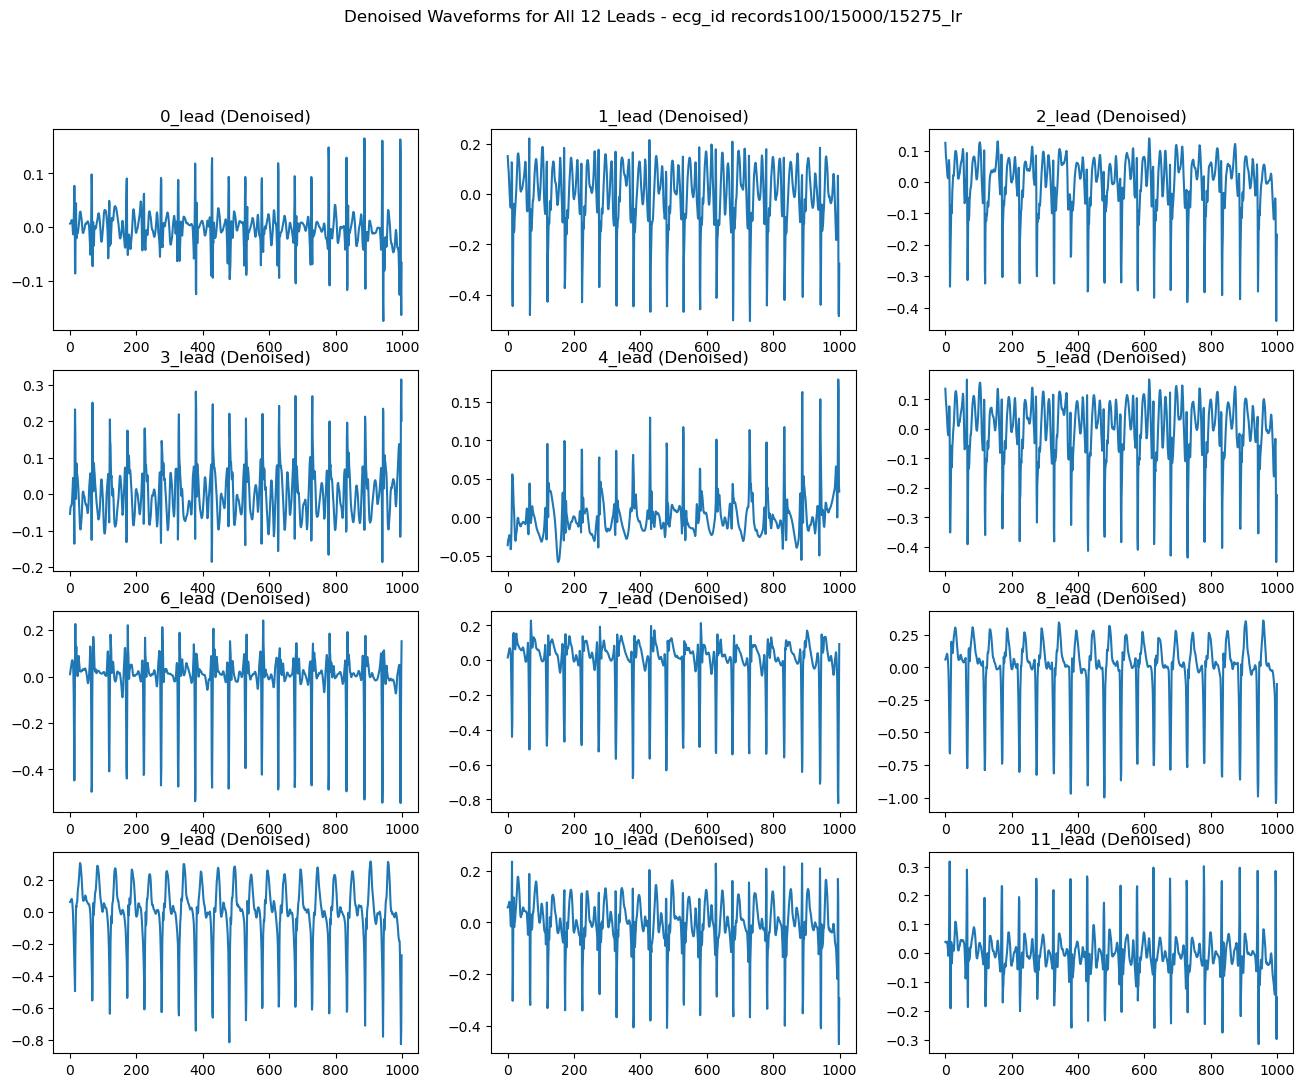

In [35]:
import pywt

# Function for wavelet denoising
def wavelet_denoise(signal):
    if len(signal) == 0:
        return signal

    # Define wavelet and level of decomposition
    wavelet = 'db4'
    level = 9

    # Decompose the signal using wavelet transform
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Thresholding to remove noise
    threshold = 0.1  # You may adjust this threshold
    coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

    # Reconstruct the denoised signal
    denoised_signal = pywt.waverec(coeffs, wavelet)

    return denoised_signal

# Function to normalize signal
def normalize_signal(signal):
    # Implement your normalization logic here if needed
    return signal

# Apply denoising to all lead signals in df_ecg_signals
for lead_name in lead_names:
    df_ecg_signals[lead_name] = df_ecg_signals[lead_name].apply(wavelet_denoise)
    df_ecg_signals[lead_name] = df_ecg_signals[lead_name].apply(normalize_signal)

# Specify the ecg_id you want to visualize (here, using the first ecg_id)
ecg_id_to_visualize = df_ecg_signals['ecg_ids'].iloc[0]

# Get the corresponding row from the DataFrame
ecg_row = df_ecg_signals[df_ecg_signals['ecg_ids'] == ecg_id_to_visualize]

# Get lead names and signal values after denoising
denoised_lead_signals = ecg_row[lead_names].values.flatten()

# Visualize all 12 leads after denoising
plt.figure(figsize=(16, 12))
for lead_index, lead_name in enumerate(lead_names):
    signal = denoised_lead_signals[lead_index]
    plt.subplot(4, 3, lead_index + 1)
    plt.plot(signal)
    plt.title(f"{lead_name} (Denoised)")


plt.suptitle(f"Denoised Waveforms for All 12 Leads - ecg_id {ecg_id_to_visualize}")
plt.show()


In [36]:
print(denoised_lead_signals)

[array([ 6.50784421e-03,  6.96466344e-03,  7.89112933e-03,  9.33333757e-03,
         1.10639762e-02,  1.32136428e-02,  1.15852352e-02,  5.75952941e-03,
        -2.17614500e-03, -1.34183012e-02, -9.80036244e-03,  1.04318760e-02,
         3.76378686e-02,  7.68707425e-02,  3.85613129e-02, -8.62536939e-02,
        -8.61272791e-02,  3.06802600e-02,  4.45048132e-02, -1.30267375e-02,
        -2.06481767e-02, -9.88701424e-03, -1.16827518e-02, -1.17026527e-02,
        -8.49535095e-03, -3.87310610e-03,  1.34269210e-03,  7.10066255e-03,
         1.46005089e-02,  2.36224568e-02,  2.85380052e-02,  2.89768954e-02,
         2.74781641e-02,  2.25017581e-02,  1.76526213e-02,  1.31192386e-02,
         5.74808041e-03, -3.73675882e-03, -9.33177866e-03, -1.08826921e-02,
        -1.07775190e-02, -7.45536307e-03, -5.25631359e-03, -4.40017638e-03,
        -1.38520367e-03,  2.87706665e-03,  5.54074841e-03,  6.76598379e-03,
         7.29424575e-03,  6.45231764e-03,  6.81742462e-03,  8.48641092e-03,
         9.6

In [37]:
# Assuming 'denoised_lead_signals' is a 2D array with each column representing a lead signal
for lead_index, lead_name in enumerate(lead_names):
    signal = denoised_lead_signals[:, lead_index]  # Access the signal for the current lead

    # Print the signal data
    print(f"Lead {lead_name} (Denoised) - Signal Data: {signal}")

    # Plot the signal
    plt.subplot(4, 3, lead_index + 1)
    plt.plot(signal)
    plt.title(f"{lead_name} (Denoised)")

plt.suptitle("Denoised Waveforms")
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
# # Assuming 'denoised_lead_signals' is a 2D array with each column representing a lead signal
# for lead_index, lead_name in enumerate(lead_names):
#     signal = denoised_lead_signals[:, lead_index]  # Access the signal for the current lead

#     # Compute the derivative of the signal
#     derivative = np.diff(signal)

#     # Check if the derivative is not empty
#     if len(derivative) > 0:
#         # Set a threshold for detecting peaks in the derivative
#         threshold = 0.1 * np.max(derivative)

#         # Find indices where the derivative crosses the threshold
#         r_peaks_indices = np.where(derivative > threshold)[0] + 1  # Adding 1 to adjust for the diff operation

#         # Plot the signal with detected R-peaks
#         plt.subplot(4, 3, lead_index + 1)
#         plt.plot(signal)
#         plt.plot(r_peaks_indices, signal[r_peaks_indices], 'ro')  # Mark R-peaks in red
#         plt.title(f"{lead_name} (Denoised)")
#     else:
#         print(f"Warning: Derivative is empty for lead {lead_name}. No R-peaks detected.")

# plt.suptitle(f"Denoised Waveforms with Derivative-based R-peaks")
# plt.show()


# Extracting Features using Wavelet Transform

In [39]:
# # Function to extract ST segment feature
# def extract_st_segment_feature(signal):
#     # Implement your ST segment feature extraction logic here
#     # Example: Measure the elevation or depression of the ST segment
#     st_segment_feature = np.max(signal) - np.min(signal)
#     return st_segment_feature

# # Function to extract QRS complex amplitude feature
# def extract_qrs_amplitude_feature(signal):
#     # Implement your QRS complex amplitude feature extraction logic here
#     # Example: Analyze the amplitude of the QRS complex
#     qrs_amplitude_feature = np.max(signal) 
#     return qrs_amplitude_feature

# # Apply feature extraction to all lead signals in df_ecg_signals
# for lead_name in lead_names:
#     # Extract features for each lead
#     df_ecg_signals[f'{lead_name}_ST'] = df_ecg_signals[lead_name].apply(extract_st_segment_feature)
#     df_ecg_signals[f'{lead_name}_QRS'] = df_ecg_signals[lead_name].apply(extract_qrs_amplitude_feature)
#     df_ecg_signals[f'{lead_name}_QT'] = df_ecg_signals[lead_name].apply(extract_qt_interval_feature)
#     df_ecg_signals[f'{lead_name}_RR'] = df_ecg_signals[lead_name].apply(extract_rr_interval_feature)

# # Display extracted features for the first lead
# ecg_id_to_visualize = df_ecg_signals['ecg_ids'].iloc[0]
# ecg_row = df_ecg_signals[df_ecg_signals['ecg_ids'] == ecg_id_to_visualize]

# for lead_name in lead_names:
#     print(f"{lead_name} - ST Segment Feature: {ecg_row[f'{lead_name}_ST'].iloc[0]}")
#     print(f"{lead_name} - QRS Amplitude Feature: {ecg_row[f'{lead_name}_QRS'].iloc[0]}")


import pywt
import numpy as np
import pandas as pd

# Function to extract features using Daubechies wavelet transform
def extract_wavelet_features(signal, wavelet='db4', level=4):
    # Perform wavelet decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Extract features from wavelet coefficients
    energy_feature = [np.sum(np.square(c)) for c in coeffs]
    entropy_feature = [np.sum(np.abs(c) ** 2 * np.log(np.abs(c) ** 2)) for c in coeffs]
    
    # Additional features related to myocardial infarction classification
    mean_feature = [np.mean(c) for c in coeffs]
    variance_feature = [np.var(c) for c in coeffs]
    skewness_feature = [np.sum((c - np.mean(c))**3) / (len(c) * np.std(c)**3) for c in coeffs]
    kurtosis_feature = [np.sum((c - np.mean(c))**4) / (len(c) * np.std(c)**4) for c in coeffs]
    
    # Additional statistical features
    min_feature = [np.min(c) for c in coeffs]
    max_feature = [np.max(c) for c in coeffs]
    range_feature = [np.max(c) - np.min(c) for c in coeffs]
    median_feature = [np.median(c) for c in coeffs]
    mad_feature = [np.median(np.abs(c - np.median(c))) for c in coeffs]
    
    return energy_feature, entropy_feature, mean_feature, variance_feature, skewness_feature, kurtosis_feature, min_feature, max_feature, range_feature, median_feature, mad_feature



# Apply feature extraction to all lead signals in df_ecg_signals
for lead_name in lead_names:
    # Extract features for each lead using Daubechies wavelet transform
    features = df_ecg_signals[lead_name].apply(lambda x: extract_wavelet_features(x))

    # Unpack and create DataFrame columns
    for i, feature_type in enumerate(['Energy', 'Entropy', 'Mean', 'Variance', 'Skewness', 'Kurtosis', 'Min', 'Max', 'Range', 'Median', 'Mad']):
        df_ecg_signals[f'{lead_name}_{feature_type}'] = [f[i] for f in features]

# Display extracted features for the first lead
ecg_id_to_visualize = df_ecg_signals['ecg_ids'].iloc[0]
ecg_row = df_ecg_signals[df_ecg_signals['ecg_ids'] == ecg_id_to_visualize]

for lead_name in lead_names:
    print(f"{lead_name} - Energy Feature: {ecg_row[f'{lead_name}_Energy'].iloc[0]}")
    print(f"{lead_name} - Entropy Feature: {ecg_row[f'{lead_name}_Entropy'].iloc[0]}")
    print(f"{lead_name} - Mean Feature: {ecg_row[f'{lead_name}_Mean'].iloc[0]}")
    print(f"{lead_name} - Variance Feature: {ecg_row[f'{lead_name}_Variance'].iloc[0]}")
    print(f"{lead_name} - Skewness Feature: {ecg_row[f'{lead_name}_Skewness'].iloc[0]}")
    print(f"{lead_name} - Kurtosis Feature: {ecg_row[f'{lead_name}_Kurtosis'].iloc[0]}")
    print(f"{lead_name} - Min Feature: {ecg_row[f'{lead_name}_Min'].iloc[0]}")
    print(f"{lead_name} - Max Feature: {ecg_row[f'{lead_name}_Max'].iloc[0]}")
    print(f"{lead_name} - Range Feature: {ecg_row[f'{lead_name}_Range'].iloc[0]}")
    print(f"{lead_name} - Median Feature: {ecg_row[f'{lead_name}_Median'].iloc[0]}")
    print(f"{lead_name} - Mad Feature: {ecg_row[f'{lead_name}_Mad'].iloc[0]}")
    print()



C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\2098834983.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ecg_signals[f'{lead_name}_{feature_type}'] = [f[i] for f in features]
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\2098834983.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ecg_signals[f'{lead_name}_{feature_type}'] = [f[i] for f in features]
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\2098834983.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usua

0_lead - Energy Feature: [0.1762328072427324, 0.1463376380011511, 0.2865733320437345, 0.7172143009792655, 0.026559781545703064]
0_lead - Entropy Feature: [-0.7441660595688677, -0.6968121699397647, -1.2233759418786256, nan, nan]
0_lead - Mean Feature: [-0.01003082823991525, -0.000340392255660634, -0.0031518595931371942, -0.0024915768875197874, -0.0005910020661267321]
0_lead - Variance Feature: [0.002453481140513093, 0.002120719466462303, 0.002177648468461901, 0.0028063971464930494, 5.245346316956966e-05]
0_lead - Skewness Feature: [-2.054995613151809, 0.09568072739736741, -0.03335745018187154, -0.2588074136060081, -5.496077670943629]
0_lead - Kurtosis Feature: [11.182454300491727, 4.641308436850599, 7.544441410263094, 17.685939075158515, 45.699445902790686]
0_lead - Min Feature: [-0.23944221719920628, -0.10758382169529304, -0.1521373960116062, -0.2728940915564123, -0.0668387356500534]
0_lead - Max Feature: [0.12265975448087377, 0.13018359061817142, 0.15874487334172643, 0.299912014634619

C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\2098834983.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ecg_signals[f'{lead_name}_{feature_type}'] = [f[i] for f in features]
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\2098834983.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ecg_signals[f'{lead_name}_{feature_type}'] = [f[i] for f in features]
C:\Users\Emmanuel Kissi\AppData\Local\Temp\ipykernel_12848\2098834983.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usua

In [40]:
# from sklearn.preprocessing import StandardScaler

# # Iterate over feature types
# for feature_type in ['Energy', 'Entropy', 'Mean', 'Variance', 'Skewness', 'Kurtosis', 'Min', 'Max', 'Range', 'Median', 'Mad']:
#     feature_columns = [f'{lead_name}_{feature_type}' for lead_name in lead_names]

#     # Flatten each feature into a 1D array
#     features = df_ecg_signals[feature_columns].apply(lambda x: np.array(x).flatten(), axis=1)
#     flattened_features = np.vstack(features)

#     # Standardize features
#     scaler = StandardScaler()
#     features_scaled = scaler.fit_transform(flattened_features)

#     # Create new columns with standardized features
#     for i in range(features_scaled.shape[1]):
#         df_ecg_signals[f'{feature_type}_scaled_{i}'] = features_scaled[:, i]

# # Display the preprocessed DataFrame
print(df_ecg_signals.head())


                     ecg_ids  \
0  records100/15000/15275_lr   
1  records100/17000/17593_lr   
2  records100/03000/03523_lr   
3  records100/20000/20016_lr   
4  records100/03000/03960_lr   

                                              0_lead  \
0  [0.0065078442143558495, 0.00696466343854793, 0...   
1  [-0.14816322321216158, -0.15181829673315367, -...   
2  [-0.041767438595268776, -0.042550449378662196,...   
3  [-0.023171663423071226, -0.025606638171116945,...   
4  [-0.0375703189150483, -0.03735078453078987, -0...   

                                              1_lead  \
0  [0.15149041116731327, 0.12593613977701548, 0.1...   
1  [-0.19295759238481788, -0.19446152656159554, -...   
2  [0.12549381078394586, 0.10351104487945305, 0.0...   
3  [-0.01186536990912987, -0.020384844654131005, ...   
4  [-0.00968419554512158, -0.008853749002543859, ...   

                                              2_lead  \
0  [0.12535704803959108, 0.09752308828450058, 0.0...   
1  [-0.03302477895882

In [41]:
print(df_ecg_signals)

                         ecg_ids  \
0      records100/15000/15275_lr   
1      records100/17000/17593_lr   
2      records100/03000/03523_lr   
3      records100/20000/20016_lr   
4      records100/03000/03960_lr   
...                          ...   
10142  records100/18000/18701_lr   
10143  records100/10000/10975_lr   
10144  records100/01000/01081_lr   
10145  records100/10000/10366_lr   
10146  records100/12000/12991_lr   

                                                  0_lead  \
0      [0.0065078442143558495, 0.00696466343854793, 0...   
1      [-0.14816322321216158, -0.15181829673315367, -...   
2      [-0.041767438595268776, -0.042550449378662196,...   
3      [-0.023171663423071226, -0.025606638171116945,...   
4      [-0.0375703189150483, -0.03735078453078987, -0...   
...                                                  ...   
10142  [-0.020126824740406682, -0.020694005921320747,...   
10143  [-0.05544508754324206, -0.05619211723342348, -...   
10144  [-0.0608413806945849

In [55]:
import pandas as pd

# Assuming df_ecg_signals is your dataframe
df_combined_features = df_ecg_signals.drop(columns=['ecg_ids', '0_lead', '1_lead', '2_lead', '3_lead', '4_lead', '5_lead', '6_lead', '7_lead', '8_lead', '9_lead', '10_lead', '11_lead'])

# Display the resulting dataframe
print(df_combined_features)


                                           0_lead_Energy  \
0      [0.1762328072427324, 0.1463376380011511, 0.286...   
1      [7.988559134356602, 0.6660090679696854, 0.5822...   
2      [0.5372307890290796, 0.32147514129199184, 0.52...   
3      [0.5516991126060089, 0.6857120890192759, 2.037...   
4      [2.3066960197243267, 1.2302033484018742, 1.276...   
...                                                  ...   
10142  [0.5001062679811533, 1.1645755587178868, 2.453...   
10143  [2.3088139275513004, 2.502182418250784, 3.1462...   
10144  [1.118949254468959, 0.5571295494234064, 1.3405...   
10145  [12.933654928320903, 4.543911531264543, 5.5490...   
10146  [1.183148049636805, 0.05117016686010295, 0.155...   

                                          0_lead_Entropy  \
0      [-0.7441660595688677, -0.6968121699397647, -1....   
1      [-12.915438860153145, -2.3266971707187256, -1....   
2      [-2.1552000642960882, -1.2723907195639197, nan...   
3      [-2.2562740318063765, -2.4390392

In [43]:
# import pandas as pd

# # Assuming df_ecg_signals is your dataframe
# columns_to_drop = []

# for lead in range(12):
#     columns_to_drop.extend([
#         f'{lead}_lead_ST',
#         f'{lead}_lead_QRS',
#         f'{lead}_lead_QT',
#         f'{lead}_lead_RR'
#     ])

# df_new_combined_features = df_combined_features.drop(columns=columns_to_drop)

# # Display the resulting dataframe
# print(df_new_combined_features)


KeyError: "['0_lead_ST', '0_lead_QRS', '0_lead_QT', '0_lead_RR', '1_lead_ST', '1_lead_QRS', '1_lead_QT', '1_lead_RR', '2_lead_ST', '2_lead_QRS', '2_lead_QT', '2_lead_RR', '3_lead_ST', '3_lead_QRS', '3_lead_QT', '3_lead_RR', '4_lead_ST', '4_lead_QRS', '4_lead_QT', '4_lead_RR', '5_lead_ST', '5_lead_QRS', '5_lead_QT', '5_lead_RR', '6_lead_ST', '6_lead_QRS', '6_lead_QT', '6_lead_RR', '7_lead_ST', '7_lead_QRS', '7_lead_QT', '7_lead_RR', '8_lead_ST', '8_lead_QRS', '8_lead_QT', '8_lead_RR', '9_lead_ST', '9_lead_QRS', '9_lead_QT', '9_lead_RR', '10_lead_ST', '10_lead_QRS', '10_lead_QT', '10_lead_RR', '11_lead_ST', '11_lead_QRS', '11_lead_QT', '11_lead_RR'] not found in axis"

In [56]:
# Display all columns in the new dataframe
print(df_combined_features.columns.to_list())


['0_lead_Energy', '0_lead_Entropy', '0_lead_Mean', '0_lead_Variance', '0_lead_Skewness', '0_lead_Kurtosis', '0_lead_Min', '0_lead_Max', '0_lead_Range', '0_lead_Median', '0_lead_Mad', '1_lead_Energy', '1_lead_Entropy', '1_lead_Mean', '1_lead_Variance', '1_lead_Skewness', '1_lead_Kurtosis', '1_lead_Min', '1_lead_Max', '1_lead_Range', '1_lead_Median', '1_lead_Mad', '2_lead_Energy', '2_lead_Entropy', '2_lead_Mean', '2_lead_Variance', '2_lead_Skewness', '2_lead_Kurtosis', '2_lead_Min', '2_lead_Max', '2_lead_Range', '2_lead_Median', '2_lead_Mad', '3_lead_Energy', '3_lead_Entropy', '3_lead_Mean', '3_lead_Variance', '3_lead_Skewness', '3_lead_Kurtosis', '3_lead_Min', '3_lead_Max', '3_lead_Range', '3_lead_Median', '3_lead_Mad', '4_lead_Energy', '4_lead_Entropy', '4_lead_Mean', '4_lead_Variance', '4_lead_Skewness', '4_lead_Kurtosis', '4_lead_Min', '4_lead_Max', '4_lead_Range', '4_lead_Median', '4_lead_Mad', '5_lead_Energy', '5_lead_Entropy', '5_lead_Mean', '5_lead_Variance', '5_lead_Skewness', '

In [46]:
print(df_combined_features['1_lead_Mad'].iloc[0])

[0.21333459083275877, 0.12174609319665645, 0.027540981252595194, 1.3335686721571705e-17, 6.1257422745431e-18]


In [47]:
# import pandas as pd

# # Assuming df_new_combined_features is your DataFrame
# column_names = df_combined_features.columns
# levels = ['level_1', 'level_2', 'level_3', 'level_4', 'level_5']

# # Define a function to create new columns for each element in the list
# def create_level_columns(row):
#     return pd.Series(row, index=levels)

# # Apply the function to each column and concatenate the results
# for col in column_names:
#     new_cols = df_combined_features[col].apply(create_level_columns)
#     df_combined_features = pd.concat([df_combined_features, new_cols], axis=1)

# # Drop the original columns with lists
# df_features = df_combined_features.drop(columns=column_names)


# print(df_features)


         level_1   level_2   level_3   level_4       level_5    level_1  \
0       0.176233  0.146338  0.286573  0.717214  2.655978e-02  -0.744166   
1       7.988559  0.666009  0.582285  1.082484  3.667122e-02 -12.915439   
2       0.537231  0.321475  0.522968  0.335722  3.519847e-02  -2.155200   
3       0.551699  0.685712  2.037849  1.751005  1.434513e-01  -2.256274   
4       2.306696  1.230203  1.276376  0.960617  5.291403e-01  -6.088422   
...          ...       ...       ...       ...           ...        ...   
10142   0.500106  1.164576  2.453896  3.960297  1.582680e-01  -2.154827   
10143   2.308814  2.502182  3.146210  2.926700  4.894265e-01  -6.436962   
10144   1.118949  0.557130  1.340570  3.789809  8.640563e-01  -3.858810   
10145  12.933655  4.543912  5.549024  4.695147  4.409206e-01 -10.675919   
10146   1.183148  0.051170  0.155747  0.094467  5.662333e-07  -3.618441   

        level_2   level_3   level_4  level_5  ...   level_1       level_2  \
0     -0.696812 -1.223

In [57]:
# import pandas as pd

# # Assuming df_combined_features is your DataFrame
# column_names = df_combined_features.columns
# levels = ['level_1', 'level_2', 'level_3', 'level_4', 'level_5']

# # Iterate through each column and split the list into separate columns
# for col in column_names:
#     # Convert each list in the column to a DataFrame with separate columns
#     df_levels = df_combined_features[col].apply(pd.Series)
    
#     # Check if the number of levels matches the number of columns in df_levels
#     if len(levels) != df_levels.shape[1]:
#         raise ValueError(f"Number of levels {len(levels)} does not match the number of columns {df_levels.shape[1]} in {col}")
    
#     # Assign the new column names
#     df_levels.columns = [f"{col}_{level}" for level in levels]
    
#     # Concatenate the new DataFrame with the original DataFrame
#     df_combined_features = pd.concat([df_combined_features, df_levels], axis=1)

# # Drop the original columns with lists
# df_combined_features = df_combined_features.drop(columns=column_names)


import pandas as pd

# Assuming df_combined_features is your DataFrame
column_names = df_combined_features.columns
levels = ['level_1', 'level_2', 'level_3', 'level_4', 'level_5']

# Create a new DataFrame to store the results
df_result = pd.DataFrame()

# Iterate through each column and split the list into separate columns
for col in column_names:
    # Convert each list in the column to a DataFrame with separate columns
    df_levels = df_combined_features[col].apply(pd.Series)
    
    # Check if the number of levels matches the number of columns in df_levels
    if len(levels) != df_levels.shape[1]:
        raise ValueError(f"Number of levels {len(levels)} does not match the number of columns {df_levels.shape[1]} in {col}")
    
    # Assign the new column names
    df_levels.columns = [f"{col}_{level}" for level in levels]
    
    # Concatenate the new DataFrame with the result DataFrame
    df_result = pd.concat([df_result, df_levels], axis=1)

# Print or use df_result as needed
print(df_result)


       0_lead_Energy_level_1  0_lead_Energy_level_2  0_lead_Energy_level_3  \
0                   0.176233               0.146338               0.286573   
1                   7.988559               0.666009               0.582285   
2                   0.537231               0.321475               0.522968   
3                   0.551699               0.685712               2.037849   
4                   2.306696               1.230203               1.276376   
...                      ...                    ...                    ...   
10142               0.500106               1.164576               2.453896   
10143               2.308814               2.502182               3.146210   
10144               1.118949               0.557130               1.340570   
10145              12.933655               4.543912               5.549024   
10146               1.183148               0.051170               0.155747   

       0_lead_Energy_level_4  0_lead_Energy_level_5  0_lead_Ent

In [58]:
# Assuming df_result is your DataFrame containing the new features
df_result.to_csv('features.csv', index=False)


In [60]:
print(df_result.columns.to_list()) #Checking for Columns in the df_results Dataframe

['0_lead_Energy_level_1', '0_lead_Energy_level_2', '0_lead_Energy_level_3', '0_lead_Energy_level_4', '0_lead_Energy_level_5', '0_lead_Entropy_level_1', '0_lead_Entropy_level_2', '0_lead_Entropy_level_3', '0_lead_Entropy_level_4', '0_lead_Entropy_level_5', '0_lead_Mean_level_1', '0_lead_Mean_level_2', '0_lead_Mean_level_3', '0_lead_Mean_level_4', '0_lead_Mean_level_5', '0_lead_Variance_level_1', '0_lead_Variance_level_2', '0_lead_Variance_level_3', '0_lead_Variance_level_4', '0_lead_Variance_level_5', '0_lead_Skewness_level_1', '0_lead_Skewness_level_2', '0_lead_Skewness_level_3', '0_lead_Skewness_level_4', '0_lead_Skewness_level_5', '0_lead_Kurtosis_level_1', '0_lead_Kurtosis_level_2', '0_lead_Kurtosis_level_3', '0_lead_Kurtosis_level_4', '0_lead_Kurtosis_level_5', '0_lead_Min_level_1', '0_lead_Min_level_2', '0_lead_Min_level_3', '0_lead_Min_level_4', '0_lead_Min_level_5', '0_lead_Max_level_1', '0_lead_Max_level_2', '0_lead_Max_level_3', '0_lead_Max_level_4', '0_lead_Max_level_5', '0_l

In [61]:
# Drop columns with all NaN values
df_result = df_result.dropna(axis=1, how='all')

# Print or use df_result as needed
print(df_result)


       0_lead_Energy_level_1  0_lead_Energy_level_2  0_lead_Energy_level_3  \
0                   0.176233               0.146338               0.286573   
1                   7.988559               0.666009               0.582285   
2                   0.537231               0.321475               0.522968   
3                   0.551699               0.685712               2.037849   
4                   2.306696               1.230203               1.276376   
...                      ...                    ...                    ...   
10142               0.500106               1.164576               2.453896   
10143               2.308814               2.502182               3.146210   
10144               1.118949               0.557130               1.340570   
10145              12.933655               4.543912               5.549024   
10146               1.183148               0.051170               0.155747   

       0_lead_Energy_level_4  0_lead_Energy_level_5  0_lead_Ent

In [63]:
import pandas as pd
from sklearn.impute import KNNImputer

# Assuming df_result is your DataFrame with missing values
# Create a copy of the original DataFrame to preserve the original data
df_result_filled = df_result.copy()

# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Perform imputation
df_result_filled.iloc[:, :] = knn_imputer.fit_transform(df_result)

# Check if there are any remaining missing values
missing_values_after_imputation = df_result_filled.isnull().sum().sum()
print(f"Number of missing values after imputation: {missing_values_after_imputation}")

# Now df_result_filled contains the imputed values


Number of missing values after imputation: 0


In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_result_filled is your DataFrame with missing values imputed
# Create a copy of the imputed DataFrame to preserve the original data
df_result_standardized = df_result_filled.copy()

# Initialize the StandardScaler to standardize the data
scaler = StandardScaler()

# Standardize the data
df_result_standardized.iloc[:, :] = scaler.fit_transform(df_result_filled)

# Initialize PCA with the desired number of components
n_components = 30  # You can adjust the number of components based on your needs
pca = PCA(n_components=n_components)

# Fit and transform the standardized data with PCA
df_result_pca = pca.fit_transform(df_result_standardized)

# Convert the result back to a DataFrame
df_result_pca = pd.DataFrame(data=df_result_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Check the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")

# Now df_result_pca contains the principal components
# You can use df_result_pca for further analysis or modeling


Explained variance ratio: [0.11545949 0.06182269 0.0477499  0.0466992  0.04053819 0.03410569
 0.02555602 0.02411748 0.01864512 0.01674493 0.01479091 0.0141032
 0.0130887  0.01242509 0.01180505 0.01159354 0.01092904 0.01059917
 0.00989553 0.0087232  0.00796949 0.00778896 0.00738015 0.00724662
 0.00685574 0.0067113  0.0064933  0.00627628 0.00606458 0.00582657]


In [66]:
print(df_result_pca)

             PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0      -4.251124   1.933865  3.899527 -2.404474 -4.293708  1.199600  0.438180   
1      -0.620853  -1.902908  2.957660 -1.707915 -1.731563 -4.233899  2.229922   
2      -4.257404  -2.244800  3.468856 -3.076525  1.160389 -1.326298 -0.544843   
3      11.689939 -10.324185  4.283202 -5.670379  3.562418 -0.127030 -2.839302   
4       1.211345  -7.024698  1.094835 -1.475486  3.372501  9.096771 -3.001639   
...          ...        ...       ...       ...       ...       ...       ...   
10142   0.448724  -4.250641  1.770536  0.322248 -4.818188  1.317644  3.345967   
10143  -8.888408   2.922815 -5.186410  5.153074 -0.981095 -0.615556 -0.409201   
10144  -5.684203  -1.905185 -2.148461  4.001888 -1.834677  2.389075 -4.455865   
10145   2.659546  -3.759863 -3.979588  4.125700  4.650490  1.931386  0.849509   
10146 -15.221489   5.492683  1.618228 -3.974511  2.542789 -1.374815 -0.583165   

            PC8       PC9  

In [69]:
print(Y_combined['ecg_class'])

<bound method Series.count of 0        1
1        0
2        0
3        0
4        1
        ..
10142    0
10143    0
10144    1
10145    0
10146    1
Name: ecg_class, Length: 10147, dtype: int64>


In [70]:
# Assuming Y_combined is your DataFrame with the 'ecg_class' column
# Concatenate 'ecg_class' column with df_result_pca
df_result_pca_with_class = pd.concat([Y_combined['ecg_class'], df_result_pca], axis=1)

# Check the resulting DataFrame
print(df_result_pca_with_class.head())


   ecg_class        PC1        PC2       PC3       PC4       PC5       PC6  \
0          1  -4.251124   1.933865  3.899527 -2.404474 -4.293708  1.199600   
1          0  -0.620853  -1.902908  2.957660 -1.707915 -1.731563 -4.233899   
2          0  -4.257404  -2.244800  3.468856 -3.076525  1.160389 -1.326298   
3          0  11.689939 -10.324185  4.283202 -5.670379  3.562418 -0.127030   
4          1   1.211345  -7.024698  1.094835 -1.475486  3.372501  9.096771   

        PC7       PC8       PC9  ...      PC21      PC22      PC23      PC24  \
0  0.438180 -0.198631  7.735778  ... -1.666580  0.162393  2.830925 -0.323686   
1  2.229922  1.933649  3.554435  ... -0.926539 -0.068457 -0.258378  0.319498   
2 -0.544843 -0.365470  2.110214  ... -2.179822 -1.433841 -0.940225 -0.095024   
3 -2.839302  1.917813  8.494312  ...  2.017784  2.976428  1.489616  0.443041   
4 -3.001639 -6.544104  2.747496  ...  0.205929  1.373434 -2.187845  0.438188   

       PC25      PC26      PC27      PC28      PC2

In [71]:
# Count the occurrences of each class
class_counts = df_result_pca_with_class['ecg_class'].value_counts()

# Print the class counts
print(class_counts)


0    7172
1    2975
Name: ecg_class, dtype: int64


In [73]:
from sklearn.utils import resample

# Assuming df_combined is your DataFrame
df_majority = df_result_pca_with_class[df_result_pca_with_class['ecg_class'] == 0]
df_minority = df_result_pca_with_class[df_result_pca_with_class['ecg_class'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Concatenate the downsampled majority class with the minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])


In [74]:
print(df_downsampled)

       ecg_class        PC1        PC2       PC3       PC4        PC5  \
3463           0   0.912741   0.281281 -0.934467  1.073333   2.110556   
5024           0  -2.056428  -5.275905  3.680067  0.873577  -4.070144   
5991           0  -3.832521   3.034928 -0.708937  6.289707  -5.683330   
4021           0   1.969158  -9.651604  3.681791 -4.302722   0.498963   
6527           0   6.389945  -8.948313  3.349456 -1.660199  -3.324934   
...          ...        ...        ...       ...       ...        ...   
10138          1  12.359711  12.088633 -3.269595  0.254477  -5.222523   
10139          1  20.070871  15.279899  2.206019 -1.825409 -15.921061   
10141          1  -4.507174  10.370272 -4.252019  0.385377   0.988252   
10144          1  -5.684203  -1.905185 -2.148461  4.001888  -1.834677   
10146          1 -15.221489   5.492683  1.618228 -3.974511   2.542789   

             PC6        PC7       PC8       PC9  ...      PC21      PC22  \
3463    3.524452   2.413463 -0.974818 -1.860317

# Splitting Data into Training, Testing and Validation sets

In [75]:
from sklearn.model_selection import train_test_split

# Assuming df_downsampled is your DataFrame
X = df_downsampled.drop('ecg_class', axis=1)  # Features
y = df_downsampled['ecg_class']  # Target

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (4165, 30)
Validation set shape: (892, 30)
Testing set shape: (893, 30)


In [76]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


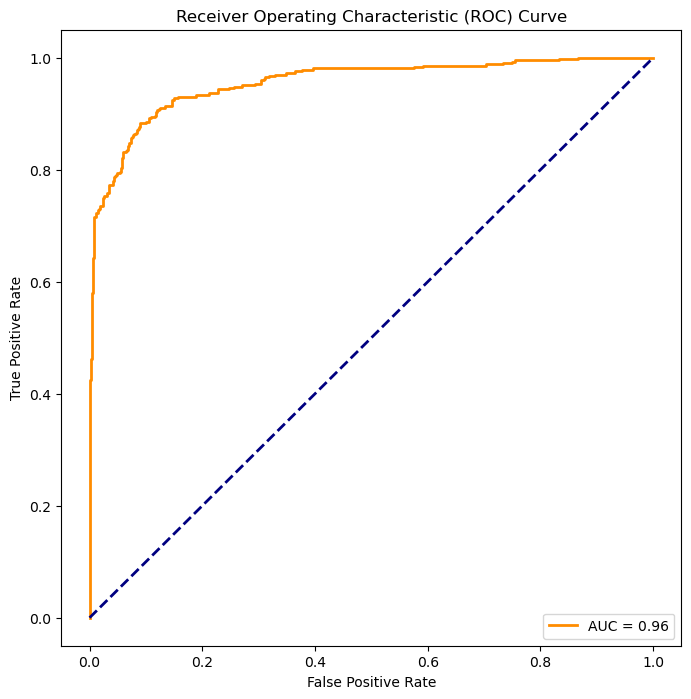

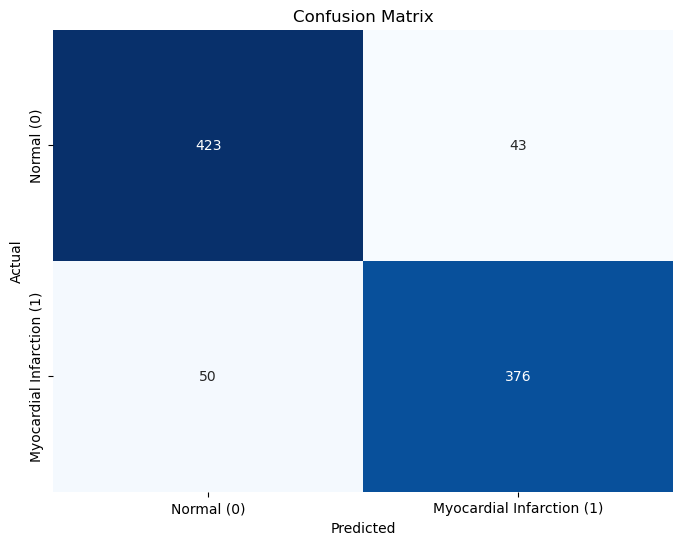

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Validation Accuracy: 0.8957399103139013
Precision: 0.8973747016706444
Recall: 0.8826291079812206
F1 Score: 0.889940828402367
AUC: 0.9554192105422233

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       466
           1       0.90      0.88      0.89       426

    accuracy                           0.90       892
   macro avg       0.90      0.90      0.90       892
weighted avg       0.90      0.90      0.90       892



In [78]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Define the SVM model
svm_model = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the SVM model with the best parameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train, y_train)

# Predictions on validation set
y_val_pred = best_svm_model.predict(X_val)



# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)
precision = metrics.precision_score(y_val, y_val_pred)
recall = metrics.recall_score(y_val, y_val_pred)
f1_score = metrics.f1_score(y_val, y_val_pred)

# AUC calculation
y_val_scores = best_svm_model.decision_function(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_scores)
auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot a visually nicer confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal (0)', 'Myocardial Infarction (1)'],
            yticklabels=['Normal (0)', 'Myocardial Infarction (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the results
print("Best Parameters:", best_params)
print("Validation Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("AUC:", auc)
print("\nClassification Report:\n", classification_rep)



In [ ]:
Training and Evaluating KNN Model

C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3

C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3

C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3

C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3

C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3

C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmanuel Kissi\anaconda3

C:\Users\Emmanuel Kissi\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.8302521         nan 0.82761104        nan 0.83385354
        nan 0.83169268        nan 0.83169268        nan 0.83313325]
  warnings.warn(


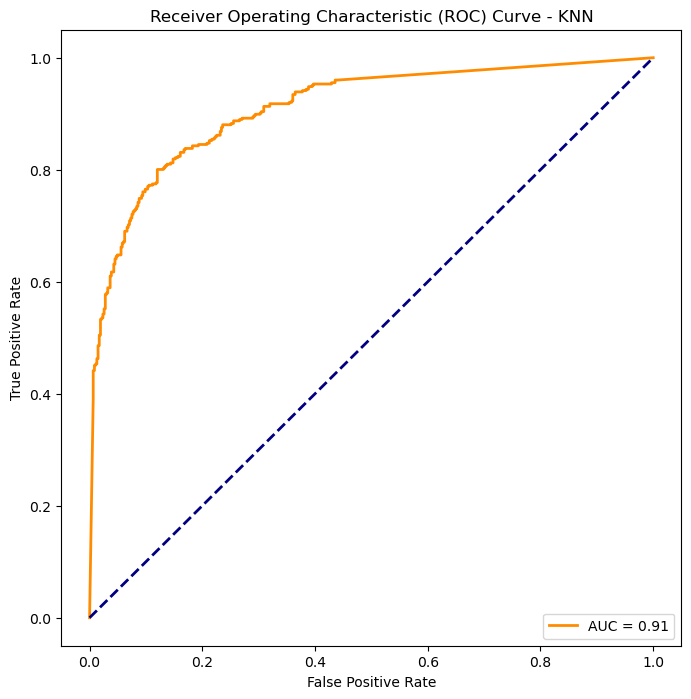

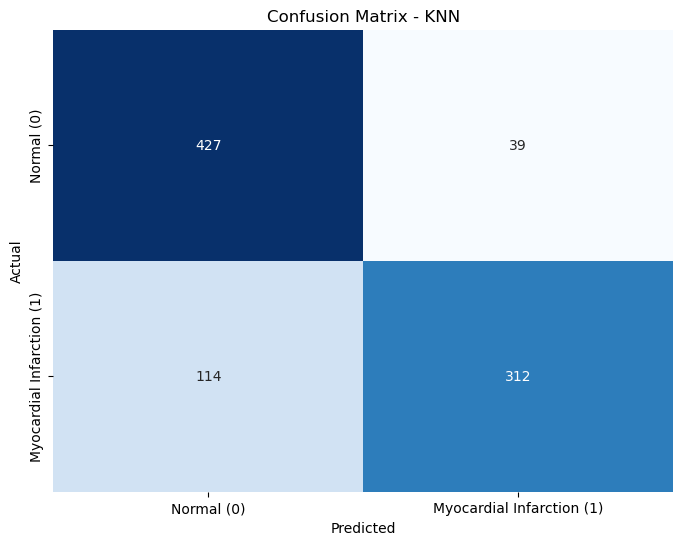

Best Parameters for KNN: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Validation Accuracy - KNN: 0.82847533632287
Precision - KNN: 0.8888888888888888
Recall - KNN: 0.7323943661971831
F1 Score - KNN: 0.8030888030888031
AUC - KNN: 0.9095941888815007

Classification Report - KNN:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       466
           1       0.89      0.73      0.80       426

    accuracy                           0.83       892
   macro avg       0.84      0.82      0.83       892
weighted avg       0.84      0.83      0.83       892



In [80]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform GridSearchCV for KNN
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

# Get the best parameters for KNN
best_knn_params = knn_grid_search.best_params_

# Train the KNN model with the best parameters
best_knn_model = KNeighborsClassifier(**best_knn_params)
best_knn_model.fit(X_train, y_train)

# Predictions on validation set for KNN
y_val_knn_pred = best_knn_model.predict(X_val)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_val, y_val_knn_pred)
conf_matrix_knn = confusion_matrix(y_val, y_val_knn_pred)
classification_rep_knn = classification_report(y_val, y_val_knn_pred)
precision_knn = metrics.precision_score(y_val, y_val_knn_pred)
recall_knn = metrics.recall_score(y_val, y_val_knn_pred)
f1_score_knn = metrics.f1_score(y_val, y_val_knn_pred)

# AUC calculation for KNN
y_val_knn_scores = best_knn_model.predict_proba(X_val)[:, 1]  # For binary classification
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_val, y_val_knn_scores)
auc_knn = metrics.auc(fpr_knn, tpr_knn)

# Plot the ROC curve for KNN
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'AUC = {auc_knn:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()

# Plot a visually nicer confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal (0)', 'Myocardial Infarction (1)'],
            yticklabels=['Normal (0)', 'Myocardial Infarction (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

# Print the results for KNN
print("Best Parameters for KNN:", best_knn_params)
print("Validation Accuracy - KNN:", accuracy_knn)
print("Precision - KNN:", precision_knn)
print("Recall - KNN:", recall_knn)
print("F1 Score - KNN:", f1_score_knn)
print("AUC - KNN:", auc_knn)
print("\nClassification Report - KNN:\n", classification_rep_knn)


Training and Evaluating Random Forest Model

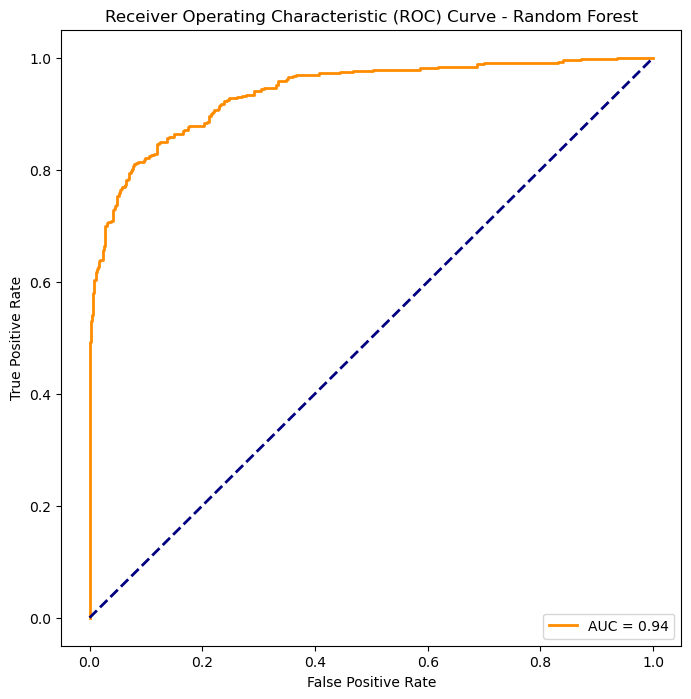

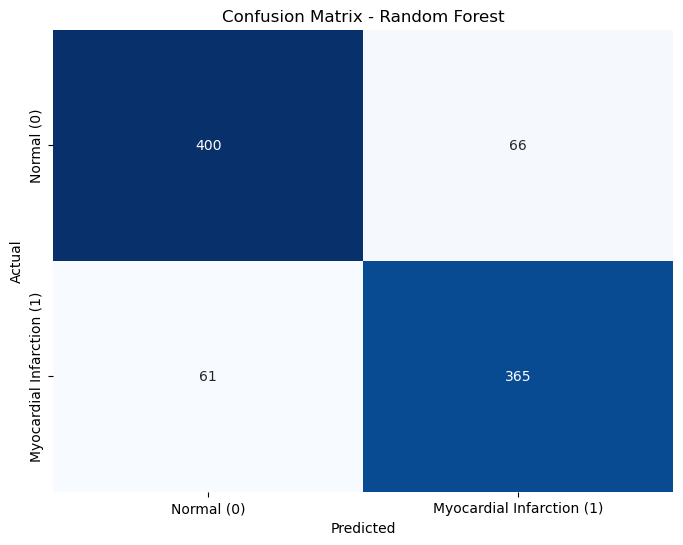

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Validation Accuracy - Random Forest: 0.8576233183856502
Precision - Random Forest: 0.8468677494199536
Recall - Random Forest: 0.8568075117370892
F1 Score - Random Forest: 0.8518086347724622
AUC - Random Forest: 0.9379193616635435

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       466
           1       0.85      0.86      0.85       426

    accuracy                           0.86       892
   macro avg       0.86      0.86      0.86       892
weighted avg       0.86      0.86      0.86       892



In [81]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Get the best parameters for Random Forest
best_rf_params = rf_grid_search.best_params_

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_rf_params)
best_rf_model.fit(X_train, y_train)

# Predictions on validation set for Random Forest
y_val_rf_pred = best_rf_model.predict(X_val)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_val, y_val_rf_pred)
conf_matrix_rf = confusion_matrix(y_val, y_val_rf_pred)
classification_rep_rf = classification_report(y_val, y_val_rf_pred)
precision_rf = metrics.precision_score(y_val, y_val_rf_pred)
recall_rf = metrics.recall_score(y_val, y_val_rf_pred)
f1_score_rf = metrics.f1_score(y_val, y_val_rf_pred)

# AUC calculation for Random Forest
y_val_rf_scores = best_rf_model.predict_proba(X_val)[:, 1]  # For binary classification
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_val, y_val_rf_scores)
auc_rf = metrics.auc(fpr_rf, tpr_rf)

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'AUC = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Plot a visually nicer confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal (0)', 'Myocardial Infarction (1)'],
            yticklabels=['Normal (0)', 'Myocardial Infarction (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Print the results for Random Forest
print("Best Parameters for Random Forest:", best_rf_params)
print("Validation Accuracy - Random Forest:", accuracy_rf)
print("Precision - Random Forest:", precision_rf)
print("Recall - Random Forest:", recall_rf)
print("F1 Score - Random Forest:", f1_score_rf)
print("AUC - Random Forest:", auc_rf)
print("\nClassification Report - Random Forest:\n", classification_rep_rf)


In [ ]:
# # Save X_combined_df to CSV
# X_combined_df.to_csv('X_combined.csv', index=False)

# # Save Y_combined to CSV
# Y_combined.to_csv('Y_combined.csv', index=False)


In [44]:
import pandas as pd
import numpy as np
import wfdb
import ast
from biosppy.signals import ecg
from sklearn.model_selection import train_test_split

def normalize_signal(signal):
    # Perform normalization (you can replace this with your preferred method)
    normalized_signal = (signal - np.mean(signal)) / np.std(signal)
    return normalized_signal

def detect_r_peaks(signal, sampling_rate):
    # R-peak detection using biosppy library
    rpeaks = ecg.ecg(signal, sampling_rate=sampling_rate)['rpeaks']
    return rpeaks

def segment_signal(signal, rpeaks):
    # Segment the signal based on R-peaks
    segments = []
    for i in range(len(rpeaks) - 1):
        segment = signal[rpeaks[i]:rpeaks[i + 1]]
        segments.append(segment)
    return segments

def extract_features(segment):
    # Extract relevant features (you can replace this with your feature extraction logic)
    # Example: Mean and standard deviation
    mean_value = np.mean(segment)
    std_dev = np.std(segment)
    return {'mean': mean_value, 'std_dev': std_dev}

# Assuming X_combined_df['signal'] is your raw ECG signal column
X_combined_df['normalized_signal'] = X_combined_df['signal'].apply(normalize_signal)

# R-Peak Detection and Segmentation
X_combined_df['rpeaks'] = X_combined_df.apply(lambda row: detect_r_peaks(row['normalized_signal'], sampling_rate), axis=1)
X_combined_df['segments'] = X_combined_df.apply(lambda row: segment_signal(row['normalized_signal'], row['rpeaks']), axis=1)

# Feature Ex''traction
X_combined_df['features'] = X_combined_df['segments'].apply(lambda segments: [extract_features(segment) for segment in segments])

# Split data into train and test
test_fold = 10
X_train_df, X_temp_df, Y_train, Y_temp = train_test_split(
    X_combined_df,
    Y_combined.loc[X_combined_df.index][Y_combined['strat_fold'] != test_fold]['ecg_class'],
    test_size=0.3,  # Adjust the test size to be 30% (remaining 70% for train and temp)
    random_state=42
)

# Now, split temp into validation and test
X_val_df, X_test_df, Y_val, Y_test = train_test_split(
    X_temp_df,
    Y_temp,
    test_size=0.5,  # Split the remaining 30% into half for validation and test
    random_state=42
)


ModuleNotFoundError: No module named 'biosppy'

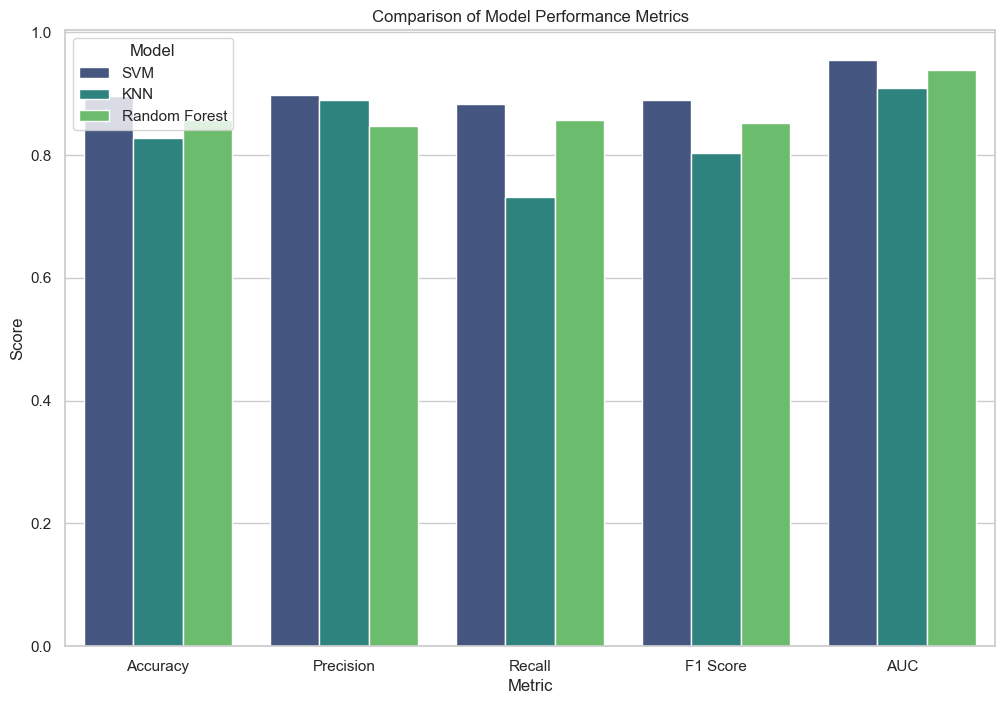

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
models = ['SVM', 'KNN', 'Random Forest']
accuracy = [0.8957399103139013, 0.82847533632287, 0.8576233183856502]
precision = [0.8973747016706444, 0.8888888888888888, 0.8468677494199536]
recall = [0.8826291079812206, 0.7323943661971831, 0.8568075117370892]
f1_score = [0.889940828402367, 0.8030888030888031, 0.8518086347724622]
auc = [0.9554192105422233, 0.9095941888815007, 0.9379193616635435]

# Create a DataFrame
df_metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'AUC': auc
})

# Melt the DataFrame for easy plotting
df_metrics_melted = pd.melt(df_metrics, id_vars=['Model'], var_name='Metric', value_name='Score')

# Set the style
sns.set(style="whitegrid")

# Create a bar chart using Seaborn
plt.figure(figsize=(12, 8))
bar_chart = sns.barplot(x='Metric', y='Score', hue='Model', data=df_metrics_melted, palette='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.show()


In [ ]:
# from sklearn.utils import shuffle

# # Combine MI and NORM datasets
# combined_data = pd.concat([df_mi_filtered, df_norm_filtered], ignore_index=True)

# # Shuffle the combined dataset
# shuffled_data = shuffle(combined_data, random_state=42)

# # Split the shuffled data into training, validation, and test sets
# train_data, test_data = train_test_split(shuffled_data, test_size=0.3, random_state=42)
# val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# # Save the split datasets to CSV
# train_data.to_csv('combined_train.csv', index=False)
# val_data.to_csv('combined_val.csv', index=False)
# test_data.to_csv('combined_test.csv', index=False)

# from sklearn.model_selection import train_test_split
##########################################################

# # Split data into train, validation, and test
# test_fold = 10

# # First, split into train and temp (which will be further split into validation and test)
# X_train, X_temp, Y_train, Y_temp = train_test_split(
#     X_combined,
#     Y_combined[Y_combined['strat_fold'] != test_fold]['ecg_class'],
#     test_size=0.3,  # Adjust the test size to be 30% (remaining 70% for train and temp)
#     random_state=42
# )

# # Now, split temp into validation and test
# X_val, X_test, Y_val, Y_test = train_test_split(
#     X_temp,
#     Y_temp,
#     test_size=0.5,  # Split the remaining 30% into half for validation and test
#     random_state=42
# )

# # Optionally, reset the index for the resulting DataFrames
# X_train.reset_index(drop=True, inplace=True)
# X_val.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
# Y_train.reset_index(drop=True, inplace=True)
# Y_val.reset_index(drop=True, inplace=True)
# Y_test.reset_index(drop=True, inplace=True)

# # Save the train, validation, and test datasets as CSV files
# X_train.to_csv('X_train.csv', index=False)
# X_val.to_csv('X_val.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)
# Y_train.to_csv('Y_train.csv', index=False)
# Y_val.to_csv('Y_val.csv', index=False)
# Y_test.to_csv('Y_test.csv', index=False)

############################################################################
# from sklearn.model_selection import train_test_split

# # Split data into train, validation, and test
# test_fold = 10

# # First, split into train and temp (which will be further split into validation and test)
# X_train, X_temp, Y_train, Y_temp = train_test_split(
#     X_combined_df,
#     X_combined_df[X_combined_df['strat_fold'] != test_fold]['ecg_class'],
#     test_size=0.3,  # Adjust the test size to be 30% (remaining 70% for train and temp)
#     random_state=42
# )

# # Now, split temp into validation and test
# X_val, X_test, Y_val, Y_test = train_test_split(
#     X_temp,
#     Y_temp,
#     test_size=0.5,  # Split the remaining 30% into half for validation and test
#     random_state=42
# )

# # Optionally, reset the index for the resulting DataFrames
# X_train.reset_index(drop=True, inplace=True)
# X_val.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
# Y_train.reset_index(drop=True, inplace=True)
# Y_val.reset_index(drop=True, inplace=True)
# Y_test.reset_index(drop=True, inplace=True)

# # Save the train, validation, and test datasets as CSV files
# X_train.to_csv('X_train.csv', index=False)
# X_val.to_csv('X_val.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)
# Y_train.to_csv('Y_train.csv', index=False)
# Y_val.to_csv('Y_val.csv', index=False)
# Y_test.to_csv('Y_test.csv', index=False)

######################################################################3

# from sklearn.model_selection import train_test_split

# # Sample X_combined_df (replace this with your actual DataFrame)
# X_combined_df = pd.DataFrame({'ecg_id': ['02932', '02933', '02934'], 'signal_data': [np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([7, 8, 9])], 'strat_fold': [8, 10, 8], 'ecg_class': ['A', 'B', 'A']})

# # Split data into train, validation, and test
# test_fold = 10

# # First, split into train and temp (which will be further split into validation and test)
# X_train, X_temp, Y_train, Y_temp = train_test_split(
#     X_combined_df,
#     X_combined_df[X_combined_df['strat_fold'] != test_fold]['ecg_class'],
#     test_size=0.3,  # Adjust the test size to be 30% (remaining 70% for train and temp)
#     random_state=42
# )

# # Now, split temp into validation and test
# X_val, X_test, Y_val, Y_test = train_test_split(
#     X_temp,
#     Y_temp,
#     test_size=0.5,  # Split the remaining 30% into half for validation and test
#     random_state=42
# )

# # Optionally, reset the index for the resulting DataFrames
# X_train.reset_index(drop=True, inplace=True)
# X_val.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
# Y_train.reset_index(drop=True, inplace=True)
# Y_val.reset_index(drop=True, inplace=True)
# Y_test.reset_index(drop=True, inplace=True)

# # Save the train, validation, and test datasets as CSV files
# X_train.to_csv('X_train.csv', index=False)
# X_val.to_csv('X_val.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)
# Y_train.to_csv('Y_train.csv', index=False)
# Y_val.to_csv('Y_val.csv', index=False)
# Y_test.to_csv('Y_test.csv', index=False)

#####################################################################
# from sklearn.model_selection import train_test_split

# # Split data into train and test
# test_fold = 10

# # Train
# X_train_df, X_temp_df, Y_train, Y_temp = train_test_split(
#     X_combined_df,
#     Y_combined.loc[X_combined_df.index][Y_combined['strat_fold'] != test_fold]['ecg_class'],
#     test_size=0.3,  # Adjust the test size to be 30% (remaining 70% for train and temp)
#     random_state=42
# )

# # Now, split temp into validation and test
# X_val_df, X_test_df, Y_val, Y_test = train_test_split(
#     X_temp_df,
#     Y_temp,
#     test_size=0.5,  # Split the remaining 30% into half for validation and test
#     random_state=42
# )

# # Optionally, reset the index for the resulting DataFrames
# X_train_df.reset_index(drop=True, inplace=True)
# X_val_df.reset_index(drop=True, inplace=True)
# X_test_df.reset_index(drop=True, inplace=True)
# Y_train.reset_index(drop=True, inplace=True)
# Y_val.reset_index(drop=True, inplace=True)
# Y_test.reset_index(drop=True, inplace=True)

# # Save the train, validation, and test datasets as CSV files
# X_train_df.to_csv('X_train.csv', index=False)
# X_val_df.to_csv('X_val.csv', index=False)
# X_test_df.to_csv('X_test.csv', index=False)
# Y_train.to_csv('Y_train.csv', index=False)
# Y_val.to_csv('Y_val.csv', index=False)
# Y_test.to_csv('Y_test.csv', index=False)



In [47]:
%pip install biosppy



  Obtaining dependency information for biosppy from https://files.pythonhosted.org/packages/51/42/8e51c099b9222d742b218b15181eb8eac76231ad68d3749aa130851e087f/biosppy-2.1.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/139.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.9 kB ? eta -:--:--
   ----------------------- ---------------- 81.9/139.9 kB 2.3 MB/s eta 0:00:01
   -------------------------------------- - 133.1/139.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 139.9/139.9 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.6 MB 9.6 MB/s eta 0:00:05
   ---------------------------------------- 0.2

In [64]:
import numpy as np
from biosppy.signals import ecg
import biosppy.signals.tools as st
import pywt
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X_combined_df and Y_combined are your dataframes
# Make sure they are loaded and processed before running this code

def wavelet_denoise(signal, wavelet='db4', level=6, chunk_size=1000):
    # Initialize an empty array to store the denoised signal
    denoised_signal = np.empty_like(signal)

    # Process the signal in chunks
    for i in range(0, len(signal), chunk_size):
        chunk = signal[i:i + chunk_size]

        # Decompose signal using wavelet transform
        coeffs = pywt.wavedec(chunk, wavelet, level=level)

        # Thresholding: Set small coefficients to zero
        threshold = 0.1 * np.max(np.abs(coeffs[1]))
        coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

        # Reconstruct denoised signal for this chunk and store in the result array
        denoised_chunk = pywt.waverec(coeffs, wavelet)
        denoised_signal[i:i + chunk_size] = denoised_chunk

    return denoised_signal



def normalize_signal(signal, window_size=100):
    # Perform normalization using a rolling window
    rolling_mean = signal.rolling(window=window_size, min_periods=1).mean()
    rolling_std = signal.rolling(window=window_size, min_periods=1).std()

    normalized_signal = (signal - rolling_mean) / rolling_std
    return normalized_signal


def detect_r_peaks(signal, sampling_rate):
    # Filter the signal
    order = int(1.5 * sampling_rate)

    # Check if the signal length is greater than the order
    if len(signal) <= order:
        order = len(signal) - 1

    filtered, _, _ = st.filter_signal(
        signal=signal,
        ftype="FIR",
        band="bandpass",
        order=order,
        frequency=[0.67, 45],
        sampling_rate=sampling_rate,
    )

    # R-peak detection using biosppy library
    rpeaks = ecg.ecg(filtered, sampling_rate=sampling_rate)['rpeaks']
    return rpeaks


def segment_signal(signal, rpeaks):
    # Segment the signal based on R-peaks
    segments = [signal[rpeaks[i]:rpeaks[i + 1]] for i in range(len(rpeaks) - 1)]
    return segments

def extract_features(segment):
    # Extract relevant features
    mean_value = np.mean(segment)
    std_dev = np.std(segment)
    return {'mean': mean_value, 'std_dev': std_dev}

# Assuming X_combined_df['signal'] is your raw ECG signal column
X_combined_df['preprocessed_signal'] = X_combined_df['signal'].apply(wavelet_denoise)
X_combined_df['preprocessed_signal'] = X_combined_df['preprocessed_signal'].apply(normalize_signal)

# R-Peak Detection and Segmentation
X_combined_df['rpeaks'] = X_combined_df['preprocessed_signal'].apply(lambda signal: detect_r_peaks(signal, sampling_rate))
X_combined_df['segments'] = X_combined_df.apply(lambda row: segment_signal(row['preprocessed_signal'], row['rpeaks']), axis=1)

# Feature Extraction
X_combined_df['features'] = X_combined_df['segments'].apply(lambda segments: [extract_features(segment) for segment in segments])

# Split data into train and test
test_fold = 10
X_train_df, X_temp_df, Y_train, Y_temp = train_test_split(
    X_combined_df,
    Y_combined.loc[X_combined_df.index][Y_combined['strat_fold'] != test_fold]['ecg_class'],
    test_size=0.3,  # Adjust the test size to be 30% (remaining 70% for train and temp)
    random_state=42
)

# Now, split temp into validation and test
X_val_df, X_test_df, Y_val, Y_test = train_test_split(
    X_temp_df,
    Y_temp,
    test_size=0.5,  # Split the remaining 30% into half for validation and test
    random_state=42
)


MemoryError: Unable to allocate 93.8 KiB for an array with shape (1000, 12) and data type float64

In [56]:
# Check signal lengths
print(X_combined_df['preprocessed_signal'].apply(len).min())


1000
